In [172]:
import pandas as pd 
import glob
import re
pd.set_option('display.max_columns',100)
pd.set_option('display.max_colwidth',100)
pd.options.display.float_format='{:,.2f}'.format

# Table of contents:
<ul>
<li><a href="#wrangling">Data wrangling and Merging</a></li>
<li><a href="#clean">Data Cleaning</a></li>
<li><a href="#corr">Correlation</a></li>
<li><a href="#Q">What is the impect of climate change on water cycle?</a></li>
<li><a href="#insights">Insights</a></li>
<li><a href="#imputation">test imputation</a></li>        
</ul>

<a id='wrangling'></a>
# Data wrangling and Merging 

In [173]:
# this is the base data cause it starts from 1960 to 2020, so we can join all dataframes by this interval.
base_data=pd.read_csv('F:\\mervat\\omdena\\data\\cleaned_data\\populaion_data_from_1960.csv')

In [174]:
base_data.head(2)

Year  Population, total  Urban population  Rural population
0  1960           26632891          10084278          16548613
1  1961           27366239          10473607          16892632

In [175]:
path = r'F:\\mervat\\omdena\\data\\cleaned_data' 
all_files = glob.glob(path + "/*.csv")

In [176]:
all_files[-6]

'F:\\\\mervat\\\\omdena\\\\data\\\\cleaned_data\\populaion_data_from_1960.csv'

In [177]:
all_files.pop(-6)

'F:\\\\mervat\\\\omdena\\\\data\\\\cleaned_data\\populaion_data_from_1960.csv'

In [178]:
li = []

for filename in all_files:
    df = pd.read_csv(filename)
    li.append(df)

In [179]:
len(li)

20

In [180]:
for df in li:
    print(df.head())
    break

   Year  Agricultural land (sq. km)
0  1961                   25,680.00
1  1962                   25,050.00
2  1963                   24,900.00
3  1964                   25,060.00
4  1965                   26,720.00


In [181]:
def normalize_cols_names(cols):
    new_names=[re.sub('\W+','_',x.lower()) for x in cols]
    for index in range(len(new_names)):
        if new_names[index].endswith('_'):
            new_names[index]=new_names[index][:-1]
            
    return new_names

In [182]:
# normalize cols names in all pdfs
for df in li:
    df.columns=normalize_cols_names(df.columns)

In [183]:
for df in li:
    print(df.head())
    break

   year  agricultural_land_sq_km
0  1961                25,680.00
1  1962                25,050.00
2  1963                24,900.00
3  1964                25,060.00
4  1965                26,720.00


In [184]:
base_data.columns=normalize_cols_names(base_data.columns)

In [185]:
base_data.columns

Index(['year', 'population_total', 'urban_population', 'rural_population'], dtype='object')

In [186]:
# base_data.set_index('year',inplace=True)

In [187]:
base_data.head(2)

year  population_total  urban_population  rural_population
0  1960          26632891          10084278          16548613
1  1961          27366239          10473607          16892632

In [188]:
# for df in li:
#     df.set_index('year',inplace=True)
# for df in li:
#     frame=base_data.merge(df,on='year',how='outer')

In [189]:
from functools import reduce
df = reduce(lambda x,y: pd.merge(x,y,on='year',how='outer'),li)

In [190]:
df.head()

year  agricultural_land_sq_km  animals_production_head  \
0  1961                25,680.00             4,868,000.00   
1  1962                25,050.00             4,997,000.00   
2  1963                24,900.00             5,134,000.00   
3  1964                25,060.00             5,271,000.00   
4  1965                26,720.00             5,417,000.00   

   arable_land_of_land_area  barley_tonnes  maize_tonnes  rice_paddy_tonnes  \
0                      2.51     132,910.00  1,617,130.00       1,142,000.00   
1                      2.44     146,296.00  2,003,690.00       2,038,000.00   
2                      2.42     134,362.00  1,867,000.00       2,219,000.00   
3                      2.43     142,174.00  1,934,212.00       2,036,000.00   
4                      2.59     129,606.00  2,141,000.00       1,789,000.00   

   rice_paddy_rice_milled_equivalent__tonnes  rye_tonnes  sorghum_tonnes  \
0                                 761,714.00         nan      681,000.00   
1                               1,359,346.00         nan      658,849.00   
2                               1,480,073.00         nan      729,000.00   
3                               1,358,012.00         nan      739,640.00   
4                               1,193,263.00         nan      806,000.00   

   wheat_tonnes  barley_hg_ha  maize_hg_ha  rice_paddy_hg_ha  rye_hg_ha  \
0  1,435,926.00     26,116.00    24,014.00         50,531.00        nan   
1  1,593,098.00     26,611.00    26,040.00         58,395.00        nan   
2  1,493,000.00     26,488.00    25,824.00         55,062.00        nan   
3  1,499,881.00     26,850.00    27,716.00         50,396.00        nan   
4  1,272,000.00     24,642.00    40,703.00         50,253.00        nan   

   sorghum_hg_ha  wheat_hg_ha  cereal_yield_kg_per_hectare  co2_emissions_kt  \
0      35,446.00    24,697.00                     2,905.70         17,088.22   
1      34,487.00    26,064.00                     3,259.60         18,595.36   
2      35,911.00    26,425.00                     3,312.80         21,554.63   
3      35,526.00    27,551.00                     3,330.10         25,522.32   
4      38,381.00    26,445.00                     3,775.60         27,641.85   

   transpiration_sum  evaporation_sum  eti_sum  npp_sum  ret_sum  gwp_mean  \
0                nan              nan      nan      nan      nan       nan   
1                nan              nan      nan      nan      nan       nan   
2                nan              nan      nan      nan      nan       nan   
3                nan              nan      nan      nan      nan       nan   
4                nan              nan      nan      nan      nan       nan   

   renewable_internal_freshwater_resources_per_capita_cubic_meters  \
0                                                              nan   
1                                                            35.57   
2                                                              nan   
3                                                              nan   
4                                                              nan   

   annual_freshwater_withdrawals_total_billion_cubic_meters  \
0                                                       nan   
1                                                       nan   
2                                                       nan   
3                                                       nan   
4                                                       nan   

   annual_freshwater_withdrawals_agriculture_of_total_freshwater_withdrawal  \
0                                                                       nan   
1                                                                       nan   
2                                                                       nan   
3                                                                       nan   
4                                                                       nan   

   annual_freshwater_withdra

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 0 to 61
Data columns (total 83 columns):
year                                                                                                                                       62 non-null int64
agricultural_land_sq_km                                                                                                                    58 non-null float64
animals_production_head                                                                                                                    59 non-null float64
arable_land_of_land_area                                                                                                                   58 non-null float64
barley_tonnes                                                                                                                              59 non-null float64
maize_tonnes                                                                                            

In [192]:
data=base_data.merge(df,on='year',how='outer')

In [193]:
data.head(1)

year  population_total  urban_population  rural_population  \
0  1960     26,632,891.00     10,084,278.00     16,548,613.00   

   agricultural_land_sq_km  animals_production_head  arable_land_of_land_area  \
0                      nan                      nan                       nan   

   barley_tonnes  maize_tonnes  rice_paddy_tonnes  \
0            nan           nan                nan   

   rice_paddy_rice_milled_equivalent__tonnes  rye_tonnes  sorghum_tonnes  \
0                                        nan         nan             nan   

   wheat_tonnes  barley_hg_ha  maize_hg_ha  rice_paddy_hg_ha  rye_hg_ha  \
0           nan           nan          nan               nan        nan   

   sorghum_hg_ha  wheat_hg_ha  cereal_yield_kg_per_hectare  co2_emissions_kt  \
0            nan          nan                          nan         16,054.13   

   transpiration_sum  evaporation_sum  eti_sum  npp_sum  ret_sum  gwp_mean  \
0                nan              nan      nan      nan      nan       nan   

   renewable_internal_freshwater_resources_per_capita_cubic_meters  \
0                                                              nan   

   annual_freshwater_withdrawals_total_billion_cubic_meters  \
0                                                       nan   

   annual_freshwater_withdrawals_agriculture_of_total_freshwater_withdrawal  \
0                                                                       nan   

   annual_freshwater_withdrawals_domestic_of_total_freshwater_withdrawal  \
0                                                                    nan   

   annual_freshwater_withdrawals_industry_of_total_freshwater_withdrawal  \
0                                                                    nan   

   water_productivity_total_constant_2010_us_gdp_per_cubic_meter_of_total_freshwater_withdrawal  \
0                                                                                           nan   

   barley_ha  maize_ha  rice_paddy_ha  rye_ha  sorghum_ha  wheat_ha  \
0        nan       nan            nan     nan         nan       nan   

   land_area_equipped_for_irrigation_ha  \
0                                   nan   

   water_use_efficiency_united_states_dollars_per_cubic_meter  \
0                                                         nan   

   level_of_water_stress_freshwater_withdrawal_as_a_proportion_of_available_freshwater_resources  \
0                                                                                            nan   

   methane_emissions_kt_of_co2_equivalent  \
0                                     nan   

   nitrous_oxide_emissions_thousand_metric_tons_of_co2_equivalent  \
0                                                             nan   

   climatic_water_deficit_annual_kg_m2  \
0                                  nan   

   potential_evapotranspiration_annual_kg_m2  \
0                                        nan   

   wapor_gross_water_productivity_annual_kg_m3  \
0                                          nan   

   wapor_net_primary_production_annual_g_m2  \
0                                       nan   

   wapor_reference_evapotranspiration_annual_mm  desalinated_watermio_m3_y_x  \
0                                           nan                          nan   

   exports_of_watermio_m3_y_x  fresh_groundwater_abstracted_mio_m3_y  \
0                         nan                                    nan   

   fresh_surface_water_abstracted_mio_m3_y  \
0                                      nan   

   freshwater_abstracted_fresh_surface_water_abstracted_fresh_groundwater_abstracted_mio_m3_y  \
0                                                                                         nan   

   imports_of_watermio_m3_y_x  losses_during_transportmio_m3_y  \
0                         nan                              nan   

   net_freshwater_abstracted_freshwater_abstracted_water_returned_without_use_mio_m3_y  \
0                                                            

In [194]:
data.tail(2)

year  population_total  urban_population  rural_population  \
60  2020    102,334,403.00     43,781,728.00     58,552,675.00   
61  2021               nan               nan               nan   

    agricultural_land_sq_km  animals_production_head  \
60                      nan                      nan   
61                      nan                      nan   

    arable_land_of_land_area  barley_tonnes  maize_tonnes  rice_paddy_tonnes  \
60                       nan            nan           nan                nan   
61                       nan            nan           nan                nan   

    rice_paddy_rice_milled_equivalent__tonnes  rye_tonnes  sorghum_tonnes  \
60                                        nan         nan             nan   
61                                        nan         nan             nan   

    wheat_tonnes  barley_hg_ha  maize_hg_ha  rice_paddy_hg_ha  rye_hg_ha  \
60           nan           nan          nan               nan        nan   
61           nan           nan          nan               nan        nan   

    sorghum_hg_ha  wheat_hg_ha  cereal_yield_kg_per_hectare  co2_emissions_kt  \
60            nan          nan                          nan               nan   
61            nan          nan                          nan               nan   

    transpiration_sum  evaporation_sum  eti_sum  npp_sum  ret_sum  gwp_mean  \
60              53.76            51.31    93.63     2.66 2,452.69      0.06   
61                nan              nan      nan      nan      nan       nan   

    renewable_internal_freshwater_resources_per_capita_cubic_meters  \
60                                                              nan   
61                                                              nan   

    annual_freshwater_withdrawals_total_billion_cubic_meters  \
60                                                       nan   
61                                                       nan   

    annual_freshwater_withdrawals_agriculture_of_total_freshwater_withdrawal  \
60                                                                       nan   
61                                                                       nan   

    annual_freshwater_withdrawals_domestic_of_total_freshwater_withdrawal  \
60                                                                    nan   
61                                                                    nan   

    annual_freshwater_withdrawals_industry_of_total_freshwater_withdrawal  \
60                                                                    nan   
61                                                                    nan   

    water_productivity_total_constant_2010_us_gdp_per_cubic_meter_of_total_freshwater_withdrawal  \
60                                                                                           nan   
61                                                                                           nan   

    barley_ha  maize_ha  rice_paddy_ha  rye_ha  sorghum_ha  wheat_ha  \
60        nan       nan            nan     nan         nan       nan   
61        nan       nan            nan     nan         nan       nan   

    land_area_equipped_for_irrigation_ha  \
60                                   nan   
61                                   nan   

    water_use_efficiency_united_states_dollars_per_cubic_meter  \
60                                                         nan   
61                                                         nan   

    level_of_water_stress_freshwater_withdrawal_as_a_proportion_of_available_freshwater_resources  \
60                                                                                            nan   
61                                                                                            nan   

    methane_emissions_kt_of_co2_equivalent  \
60                                     nan   
61                                     nan   

    nitrous_oxide_emissions_thousand_metric_ton

In [195]:
data=data.iloc[:-1,:]

In [196]:
data.tail(1)

year  population_total  urban_population  rural_population  \
60  2020    102,334,403.00     43,781,728.00     58,552,675.00   

    agricultural_land_sq_km  animals_production_head  \
60                      nan                      nan   

    arable_land_of_land_area  barley_tonnes  maize_tonnes  rice_paddy_tonnes  \
60                       nan            nan           nan                nan   

    rice_paddy_rice_milled_equivalent__tonnes  rye_tonnes  sorghum_tonnes  \
60                                        nan         nan             nan   

    wheat_tonnes  barley_hg_ha  maize_hg_ha  rice_paddy_hg_ha  rye_hg_ha  \
60           nan           nan          nan               nan        nan   

    sorghum_hg_ha  wheat_hg_ha  cereal_yield_kg_per_hectare  co2_emissions_kt  \
60            nan          nan                          nan               nan   

    transpiration_sum  evaporation_sum  eti_sum  npp_sum  ret_sum  gwp_mean  \
60              53.76            51.31    93.63     2.66 2,452.69      0.06   

    renewable_internal_freshwater_resources_per_capita_cubic_meters  \
60                                                              nan   

    annual_freshwater_withdrawals_total_billion_cubic_meters  \
60                                                       nan   

    annual_freshwater_withdrawals_agriculture_of_total_freshwater_withdrawal  \
60                                                                       nan   

    annual_freshwater_withdrawals_domestic_of_total_freshwater_withdrawal  \
60                                                                    nan   

    annual_freshwater_withdrawals_industry_of_total_freshwater_withdrawal  \
60                                                                    nan   

    water_productivity_total_constant_2010_us_gdp_per_cubic_meter_of_total_freshwater_withdrawal  \
60                                                                                           nan   

    barley_ha  maize_ha  rice_paddy_ha  rye_ha  sorghum_ha  wheat_ha  \
60        nan       nan            nan     nan         nan       nan   

    land_area_equipped_for_irrigation_ha  \
60                                   nan   

    water_use_efficiency_united_states_dollars_per_cubic_meter  \
60                                                         nan   

    level_of_water_stress_freshwater_withdrawal_as_a_proportion_of_available_freshwater_resources  \
60                                                                                            nan   

    methane_emissions_kt_of_co2_equivalent  \
60                                     nan   

    nitrous_oxide_emissions_thousand_metric_tons_of_co2_equivalent  \
60                                                             nan   

    climatic_water_deficit_annual_kg_m2  \
60                                69.39   

    potential_evapotranspiration_annual_kg_m2  \
60                                      85.07   

    wapor_gross_water_productivity_annual_kg_m3  \
60                                         0.06   

    wapor_net_primary_production_annual_g_m2  \
60                                      0.22   

    wapor_reference_evapotranspiration_annual_mm  desalinated_watermio_m3_y_x  \
60                                      2,452.69                          nan   

    exports_of_watermio_m3_y_x  fresh_groundwater_abstracted_mio_m3_y  \
60                         nan                                    nan   

    fresh_surface_water_abstracted_mio_m3_y  \
60                                      nan   

    freshwater_abstracted_fresh_surface_water_abstracted_fresh_groundwater_abstracted_mio_m3_y  \
60                                                                                         nan   

    imports_of_watermio_m3_y_x  losses_during_transportmio_m3_y  \
60                         nan                              nan   

    net_freshwater_abstracted_freshwater_abstracted_water_returned_without_use_mio_m3_y  \
60   

In [197]:
data.to_csv('all_collected_data_with_nan.csv',index=False)

In [198]:
data=pd.read_csv('all_collected_data_with_nan.csv')

<a id='clean'></a>
# Data Cleaning

In [199]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 86 columns):
year                                                                                                                                       61 non-null int64
population_total                                                                                                                           61 non-null float64
urban_population                                                                                                                           61 non-null float64
rural_population                                                                                                                           61 non-null float64
agricultural_land_sq_km                                                                                                                    58 non-null float64
animals_production_head                                                                                 

In [200]:
data.columns

Index(['year', 'population_total', 'urban_population', 'rural_population',
       'agricultural_land_sq_km', 'animals_production_head',
       'arable_land_of_land_area', 'barley_tonnes', 'maize_tonnes',
       'rice_paddy_tonnes', 'rice_paddy_rice_milled_equivalent__tonnes',
       'rye_tonnes', 'sorghum_tonnes', 'wheat_tonnes', 'barley_hg_ha',
       'maize_hg_ha', 'rice_paddy_hg_ha', 'rye_hg_ha', 'sorghum_hg_ha',
       'wheat_hg_ha', 'cereal_yield_kg_per_hectare', 'co2_emissions_kt',
       'transpiration_sum', 'evaporation_sum', 'eti_sum', 'npp_sum', 'ret_sum',
       'gwp_mean',
       'renewable_internal_freshwater_resources_per_capita_cubic_meters',
       'annual_freshwater_withdrawals_total_billion_cubic_meters',
       'annual_freshwater_withdrawals_agriculture_of_total_freshwater_withdrawal',
       'annual_freshwater_withdrawals_domestic_of_total_freshwater_withdrawal',
       'annual_freshwater_withdrawals_industry_of_total_freshwater_withdrawal',
       'water_productivi

In [201]:
len(data.columns)

86

### drop irrelevant and columns with all nans

In [202]:
data.drop(['urban_population', 'rural_population',
           'water_productivity_total_constant_2010_us_gdp_per_cubic_meter_of_total_freshwater_withdrawal',
           'exports_of_watermio_m3_y_x','imports_of_watermio_m3_y_x', 'losses_during_transportmio_m3_y',
           'net_freshwater_abstracted_freshwater_abstracted_water_returned_without_use_mio_m3_y',
           'water_returned_without_usemio_m3_y','construction_isic_41_43_mio_m3_y_x',
           'electricity_gas_steam_and_air_conditioning_supply_isic_35_mio_m3_y',
           'exports_of_watermio_m3_y_y','imports_of_watermio_m3_y_y', 'irrigation_in_agriculturemio_m3_y_x',
           'mining_and_quarrying_isic_05_09_mio_m3_y',
           'other_economic_activitiesmio_m3_y','water_supply_industry_isic_36_mio_m3_y',
           '_electricity_gas_steam_and_air_conditioning_supply_isic_35_mio_m3_y',
           '_mining_and_quarrying_isic_05_09_mio_m3_y',
           '_other_economic_activitiesmio_m3_y',
           'construction_isic_41_43_mio_m3_y_y',
           'arable_land_of_land_area','fresh_groundwater_abstracted_mio_m3_y',
           'fresh_surface_water_abstracted_mio_m3_y'
           
    
],inplace=True,axis=1)

In [204]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 63 columns):
year                                                                                                                                       61 non-null int64
population_total                                                                                                                           61 non-null float64
agricultural_land_sq_km                                                                                                                    58 non-null float64
animals_production_head                                                                                                                    59 non-null float64
barley_tonnes                                                                                                                              59 non-null float64
maize_tonnes                                                                                            

In [122]:
data.columns

Index(['year', 'population_total', 'agricultural_land_sq_km',
       'animals_production_head', 'barley_tonnes', 'maize_tonnes',
       'rice_paddy_tonnes', 'rice_paddy_rice_milled_equivalent__tonnes',
       'rye_tonnes', 'sorghum_tonnes', 'wheat_tonnes', 'barley_hg_ha',
       'maize_hg_ha', 'rice_paddy_hg_ha', 'rye_hg_ha', 'sorghum_hg_ha',
       'wheat_hg_ha', 'cereal_yield_kg_per_hectare', 'co2_emissions_kt',
       'transpiration_sum', 'evaporation_sum', 'eti_sum', 'npp_sum', 'ret_sum',
       'gwp_mean',
       'renewable_internal_freshwater_resources_per_capita_cubic_meters',
       'annual_freshwater_withdrawals_total_billion_cubic_meters',
       'annual_freshwater_withdrawals_agriculture_of_total_freshwater_withdrawal',
       'annual_freshwater_withdrawals_domestic_of_total_freshwater_withdrawal',
       'annual_freshwater_withdrawals_industry_of_total_freshwater_withdrawal',
       'barley_ha', 'maize_ha', 'rice_paddy_ha', 'rye_ha', 'sorghum_ha',
       'wheat_ha', 'land_a

### drop cols with less than 12 rows not null. 

In [205]:
data.drop(['annual_freshwater_withdrawals_total_billion_cubic_meters',
           'annual_freshwater_withdrawals_agriculture_of_total_freshwater_withdrawal',
           'annual_freshwater_withdrawals_domestic_of_total_freshwater_withdrawal',
           'annual_freshwater_withdrawals_industry_of_total_freshwater_withdrawal',
           'desalinated_watermio_m3_y_x',
           'reused_watermio_m3_y_x',
           'total_freshwater_available_for_use_freshwater_abstracted_construction_other_economic_activities_desalinated_water_reused_water_mio_m3_y',
           'total_freshwater_use_imports_of_water_exports_of_water_mio_m3_y',
           'agriculture_forestry_and_fishing_isic_01_03_mio_m3_y',
           'desalinated_watermio_m3_y_y', 'households_mio_m3_y',
           'manufacturing_isic_10_33_mio_m3_y','reused_watermio_m3_y_y','irrigation_in_agriculturemio_m3_y_y'
    
],inplace=True,axis=1)

### sum cereal data to reduce the number of features 

In [207]:
cereal_crops_prod=pd.read_csv('cereal_crops_production.csv')
cereal_crops_yield=pd.read_csv('cereal_crops_yield.csv')
harvested_area_of_cereal_crops=pd.read_csv('harvested_area_of_cereal_crops.csv')

In [208]:
dfs=[cereal_crops_prod,cereal_crops_yield,harvested_area_of_cereal_crops]
for df in dfs:
    display(df.head(2))
    print('-'*50)

year  barley_tonnes  maize_tonnes  rice_paddy_tonnes  \
0  1961     132,910.00  1,617,130.00       1,142,000.00   
1  1962     146,296.00  2,003,690.00       2,038,000.00   

   rice_paddy_rice_milled_equivalent__tonnes  rye_tonnes  sorghum_tonnes  \
0                                 761,714.00         nan      681,000.00   
1                               1,359,346.00         nan      658,849.00   

   wheat_tonnes  
0  1,435,926.00  
1  1,593,098.00

--------------------------------------------------


year  barley_hg_ha  maize_hg_ha  rice_paddy_hg_ha  rye_hg_ha  \
0  1961     26,116.00    24,014.00         50,531.00        nan   
1  1962     26,611.00    26,040.00         58,395.00        nan   

   sorghum_hg_ha  wheat_hg_ha  
0      35,446.00    24,697.00  
1      34,487.00    26,064.00

--------------------------------------------------


year  barley_ha   maize_ha  rice_paddy_ha  rye_ha  sorghum_ha   wheat_ha
0  1961  50,892.00 673,399.00     226,000.00     nan  192,124.00 581,409.00
1  1962  54,976.00 769,464.00     349,000.00     nan  191,042.00 611,226.00

--------------------------------------------------


In [209]:
for df in dfs:

    df=pd.melt(df, id_vars='year',
        var_name='cereal_attr',
        value_name='value')
    display(df.head(2))
    print('-'*50)

year    cereal_attr      value
0  1961  barley_tonnes 132,910.00
1  1962  barley_tonnes 146,296.00

--------------------------------------------------


year   cereal_attr     value
0  1961  barley_hg_ha 26,116.00
1  1962  barley_hg_ha 26,611.00

--------------------------------------------------


year cereal_attr     value
0  1961   barley_ha 50,892.00
1  1962   barley_ha 54,976.00

--------------------------------------------------


In [210]:
cereal_crops_prod=pd.melt(cereal_crops_prod, id_vars='year',
        var_name='cereal_attr',
        value_name='value')
cereal_crops_yield=pd.melt(cereal_crops_yield, id_vars='year',
        var_name='cereal_attr',
        value_name='value')
harvested_area_of_cereal_crops=pd.melt(harvested_area_of_cereal_crops, id_vars='year',
        var_name='cereal_attr',
        value_name='value')

In [211]:
dfs=[cereal_crops_prod,cereal_crops_yield,harvested_area_of_cereal_crops]
for df in dfs:
    display(df.head(2))
    print('-'*50)

year    cereal_attr      value
0  1961  barley_tonnes 132,910.00
1  1962  barley_tonnes 146,296.00

--------------------------------------------------


year   cereal_attr     value
0  1961  barley_hg_ha 26,116.00
1  1962  barley_hg_ha 26,611.00

--------------------------------------------------


year cereal_attr     value
0  1961   barley_ha 50,892.00
1  1962   barley_ha 54,976.00

--------------------------------------------------


In [212]:
cereal_crops_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 3 columns):
year           413 non-null int64
cereal_attr    413 non-null object
value          385 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 9.8+ KB


In [213]:
harvested_area_of_cereal_crops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 3 columns):
year           354 non-null int64
cereal_attr    354 non-null object
value          326 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.4+ KB


In [214]:
def pivot_table_sum_df(df,index,col,value,aggfunc):

    pivot=pd.pivot_table(df,index=index,columns=col,values=value,aggfunc=aggfunc,margins=True).reset_index()
    return pivot

In [215]:
for df in dfs:
    df=pivot_table_sum_df(df,'year','cereal_attr','value','sum')
    display(df.head(2))
    print('-'*50)

cereal_attr  year  barley_tonnes  maize_tonnes  \
0            1961     132,910.00  1,617,130.00   
1            1962     146,296.00  2,003,690.00   

cereal_attr  rice_paddy_rice_milled_equivalent__tonnes  rice_paddy_tonnes  \
0                                           761,714.00       1,142,000.00   
1                                         1,359,346.00       2,038,000.00   

cereal_attr  rye_tonnes  sorghum_tonnes  wheat_tonnes          All  
0                  0.00      681,000.00  1,435,926.00 5,770,680.00  
1                  0.00      658,849.00  1,593,098.00 7,799,279.00

--------------------------------------------------


cereal_attr  year  barley_hg_ha  maize_hg_ha  rice_paddy_hg_ha  rye_hg_ha  \
0            1961     26,116.00    24,014.00         50,531.00       0.00   
1            1962     26,611.00    26,040.00         58,395.00       0.00   

cereal_attr  sorghum_hg_ha  wheat_hg_ha        All  
0                35,446.00    24,697.00 160,804.00  
1                34,487.00    26,064.00 171,597.00

--------------------------------------------------


cereal_attr  year  barley_ha   maize_ha  rice_paddy_ha  rye_ha  sorghum_ha  \
0            1961  50,892.00 673,399.00     226,000.00    0.00  192,124.00   
1            1962  54,976.00 769,464.00     349,000.00    0.00  191,042.00   

cereal_attr   wheat_ha          All  
0           581,409.00 1,723,824.00  
1           611,226.00 1,975,708.00

--------------------------------------------------


In [216]:
cereal_crops_prod=pivot_table_sum_df(cereal_crops_prod,'year','cereal_attr','value','sum')
cereal_crops_yield=pivot_table_sum_df(cereal_crops_yield,'year','cereal_attr','value','sum')
harvested_area_of_cereal_crops=pivot_table_sum_df(harvested_area_of_cereal_crops,'year','cereal_attr','value','sum')

In [217]:
cereal_crops_prod.head(2)

cereal_attr  year  barley_tonnes  maize_tonnes  \
0            1961     132,910.00  1,617,130.00   
1            1962     146,296.00  2,003,690.00   

cereal_attr  rice_paddy_rice_milled_equivalent__tonnes  rice_paddy_tonnes  \
0                                           761,714.00       1,142,000.00   
1                                         1,359,346.00       2,038,000.00   

cereal_attr  rye_tonnes  sorghum_tonnes  wheat_tonnes          All  
0                  0.00      681,000.00  1,435,926.00 5,770,680.00  
1                  0.00      658,849.00  1,593,098.00 7,799,279.00

In [218]:
cereal_crops_prod=cereal_crops_prod.loc[:,['year','All']]
cereal_crops_yield=cereal_crops_yield.loc[:,['year','All']]
harvested_area_of_cereal_crops=harvested_area_of_cereal_crops.loc[:,['year','All']]

In [219]:
cereal_crops_prod.head()

cereal_attr  year          All
0            1961 5,770,680.00
1            1962 7,799,279.00
2            1963 7,922,435.00
3            1964 7,709,919.00
4            1965 7,330,869.00

In [220]:
dfs=[cereal_crops_prod,cereal_crops_yield,harvested_area_of_cereal_crops]
for df in dfs:
    df.rename_axis(None, axis=1, inplace=True)

In [221]:
cereal_crops_yield.head()

year        All
0  1961 160,804.00
1  1962 171,597.00
2  1963 169,710.00
3  1964 168,039.00
4  1965 180,424.00

In [222]:
harvested_area_of_cereal_crops.tail()

year            All
55  2016   3,225,855.00
56  2017   3,096,519.00
57  2018   2,591,258.00
58  2019   3,435,314.00
59   All 142,255,488.00

In [223]:
cereal_crops_prod.rename(columns={'All':'cereal_crops_production_ton'},inplace=True)
cereal_crops_yield.rename(columns={'All':'cereal_crops_yield_hg_ha'},inplace=True)
harvested_area_of_cereal_crops.rename(columns={'All':'harvested_area_of_cereal_crops_ha'},inplace=True)

In [224]:
harvested_area_of_cereal_crops.tail()

year  harvested_area_of_cereal_crops_ha
55  2016                       3,225,855.00
56  2017                       3,096,519.00
57  2018                       2,591,258.00
58  2019                       3,435,314.00
59   All                     142,255,488.00

In [227]:
#remove 'All' row
cereal_crops_prod=cereal_crops_prod.iloc[:-1,:]
cereal_crops_yield=cereal_crops_yield.iloc[:-1,:]
harvested_area_of_cereal_crops=harvested_area_of_cereal_crops.iloc[:-1,:]

In [228]:
dfs=[cereal_crops_prod,cereal_crops_yield,harvested_area_of_cereal_crops]
for df in dfs:
    display(df.tail(2))
    print('-'*50)

year  cereal_crops_production_ton
57  2018                19,646,939.00
58  2019                28,587,740.00

--------------------------------------------------


year  cereal_crops_yield_hg_ha
57  2018                333,154.00
58  2019                326,939.00

--------------------------------------------------


year  harvested_area_of_cereal_crops_ha
57  2018                       2,591,258.00
58  2019                       3,435,314.00

--------------------------------------------------


In [229]:
sum_of_cereal_crops_data=pd.merge(
    pd.merge(cereal_crops_prod,cereal_crops_yield,on='year',how='outer'),harvested_area_of_cereal_crops,on='year',how='outer')

In [230]:
sum_of_cereal_crops_data.head()

year  cereal_crops_production_ton  cereal_crops_yield_hg_ha  \
0  1961                 5,770,680.00                160,804.00   
1  1962                 7,799,279.00                171,597.00   
2  1963                 7,922,435.00                169,710.00   
3  1964                 7,709,919.00                168,039.00   
4  1965                 7,330,869.00                180,424.00   

   harvested_area_of_cereal_crops_ha  
0                       1,723,824.00  
1                       1,975,708.00  
2                       1,944,683.00  
3                       1,907,398.00  
4                       1,625,595.00

In [231]:
sum_of_cereal_crops_data.to_csv('sum_of_cereal_crops_data.csv',index=False)

In [206]:
# pd.set_option('display.max_rows', data.shape[0]+1)
# display(data)

### remove cereal cols and merge the sum of it 

In [232]:
data.columns

Index(['year', 'population_total', 'agricultural_land_sq_km',
       'animals_production_head', 'barley_tonnes', 'maize_tonnes',
       'rice_paddy_tonnes', 'rice_paddy_rice_milled_equivalent__tonnes',
       'rye_tonnes', 'sorghum_tonnes', 'wheat_tonnes', 'barley_hg_ha',
       'maize_hg_ha', 'rice_paddy_hg_ha', 'rye_hg_ha', 'sorghum_hg_ha',
       'wheat_hg_ha', 'cereal_yield_kg_per_hectare', 'co2_emissions_kt',
       'transpiration_sum', 'evaporation_sum', 'eti_sum', 'npp_sum', 'ret_sum',
       'gwp_mean',
       'renewable_internal_freshwater_resources_per_capita_cubic_meters',
       'barley_ha', 'maize_ha', 'rice_paddy_ha', 'rye_ha', 'sorghum_ha',
       'wheat_ha', 'land_area_equipped_for_irrigation_ha',
       'water_use_efficiency_united_states_dollars_per_cubic_meter',
       'level_of_water_stress_freshwater_withdrawal_as_a_proportion_of_available_freshwater_resources',
       'methane_emissions_kt_of_co2_equivalent',
       'nitrous_oxide_emissions_thousand_metric_tons_of

In [233]:
data.drop(['barley_tonnes', 'maize_tonnes',
                        'rice_paddy_tonnes', 'rice_paddy_rice_milled_equivalent__tonnes',
                        'rye_tonnes', 'sorghum_tonnes', 'wheat_tonnes', 'barley_hg_ha',
                        'maize_hg_ha', 'rice_paddy_hg_ha', 'rye_hg_ha', 'sorghum_hg_ha',
                        'wheat_hg_ha','barley_ha', 'maize_ha', 'rice_paddy_ha', 'rye_ha', 'sorghum_ha',
                        'wheat_ha'
    
],axis=1,inplace=True)

In [234]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 30 columns):
year                                                                                             61 non-null int64
population_total                                                                                 61 non-null float64
agricultural_land_sq_km                                                                          58 non-null float64
animals_production_head                                                                          59 non-null float64
cereal_yield_kg_per_hectare                                                                      58 non-null float64
co2_emissions_kt                                                                                 59 non-null float64
transpiration_sum                                                                                12 non-null float64
evaporation_sum                                                                 

In [235]:
final_data=data.merge(sum_of_cereal_crops_data,on='year',how='outer')

In [236]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 0 to 60
Data columns (total 33 columns):
year                                                                                             61 non-null object
population_total                                                                                 61 non-null float64
agricultural_land_sq_km                                                                          58 non-null float64
animals_production_head                                                                          59 non-null float64
cereal_yield_kg_per_hectare                                                                      58 non-null float64
co2_emissions_kt                                                                                 59 non-null float64
transpiration_sum                                                                                12 non-null float64
evaporation_sum                                                                

In [242]:
final_data.drop('_households_mio_m3_y',inplace=True,axis=1)

In [281]:
nile_mean_flow=pd.read_csv('F:\\mervat\\omdena\\data\\cleaned_data\\nile_annual_mean_flow.csv')

In [282]:
nile_mean_flow.head(2)

time  Nile
0  1871  1120
1  1872  1160

In [284]:
nile_mean_flow.rename(columns={'time':'year','Nile':'nile'},inplace=True)

In [285]:
final_data=final_data.merge(nile_mean_flow,on='year',how='outer')

In [286]:
#save data with propper attributes
final_data.to_csv('final_data_without_imputation.csv',index=False)

<a id='corr'></a>
# Correlation 

In [287]:
import seaborn as sb
import matplotlib.pyplot as plt

In [288]:
final_data.head(2)

year  population_total  agricultural_land_sq_km  \
0 1,960.00     26,632,891.00                      nan   
1 1,961.00     27,366,239.00                25,680.00   

   animals_production_head  cereal_yield_kg_per_hectare  co2_emissions_kt  \
0                      nan                          nan         16,054.13   
1             4,868,000.00                     2,905.70         17,088.22   

   transpiration_sum  evaporation_sum  eti_sum  npp_sum  ret_sum  gwp_mean  \
0                nan              nan      nan      nan      nan       nan   
1                nan              nan      nan      nan      nan       nan   

   renewable_internal_freshwater_resources_per_capita_cubic_meters  \
0                                                              nan   
1                                                              nan   

   land_area_equipped_for_irrigation_ha  \
0                                   nan   
1                              2,568.00   

   water_use_efficiency_united_states_dollars_per_cubic_meter  \
0                                                         nan   
1                                                         nan   

   level_of_water_stress_freshwater_withdrawal_as_a_proportion_of_available_freshwater_resources  \
0                                                                                            nan   
1                                                                                            nan   

   methane_emissions_kt_of_co2_equivalent  \
0                                     nan   
1                                     nan   

   nitrous_oxide_emissions_thousand_metric_tons_of_co2_equivalent  \
0                                                             nan   
1                                                             nan   

   climatic_water_deficit_annual_kg_m2  \
0                                  nan   
1                                  nan   

   potential_evapotranspiration_annual_kg_m2  \
0                                        nan   
1                                        nan   

   wapor_gross_water_productivity_annual_kg_m3  \
0                                          nan   
1                                          nan   

   wapor_net_primary_production_annual_g_m2  \
0                                       nan   
1                                       nan   

   wapor_reference_evapotranspiration_annual_mm  \
0                                           nan   
1                                           nan   

   freshwater_abstracted_fresh_surface_water_abstracted_fresh_groundwater_abstracted_mio_m3_y  \
0                                                                                         nan   
1                                                                                         nan   

   _agriculture_forestry_and_fishing_isic_01_03_mio_m3_y  \
0                                                    nan   
1                                                    nan   

   _manufacturing_isic_10_33_mio_m3_y  rainfall_mm  mintemp_c  maxtemp_c  \
0                                 nan          nan        nan        nan   
1                                 nan          nan        nan        nan   

   cereal_crops_production_ton  cereal_crops_yield_hg_ha  \
0                          nan                       nan   
1                 5,770,680.00                160,804.00   

   harvested_area_of_cereal_crops_ha     nile  
0                                nan   815.00  
1                       1,723,824.00 1,020.00

In [289]:
final_data.corr()

year  \
year                                                                                           1.00   
population_total                                                                               0.99   
agricultural_land_sq_km                                                                        0.86   
animals_production_head                                                                        0.89   
cereal_yield_kg_per_hectare                                                                    0.95   
co2_emissions_kt                                                                               0.96   
transpiration_sum                                                                              0.92   
evaporation_sum                                                                                0.74   
eti_sum                                                                                        0.82   
npp_sum                                                                                        0.38   
ret_sum                                                                                       -0.13   
gwp_mean                                                                                       0.23   
renewable_internal_freshwater_resources_per_capita_cubic_meters                               -0.98   
land_area_equipped_for_irrigation_ha                                                           0.86   
water_use_efficiency_united_states_dollars_per_cubic_meter                                     0.98   
level_of_water_stress_freshwater_withdrawal_as_a_proportion_of_available_freshwater_resources  0.61   
methane_emissions_kt_of_co2_equivalent                                                         0.96   
nitrous_oxide_emissions_thousand_metric_tons_of_co2_equivalent                                 0.90   
climatic_water_deficit_annual_kg_m2                                                            0.32   
potential_evapotranspiration_annual_kg_m2                                                      0.47   
wapor_gross_water_productivity_annual_kg_m3                                                    0.23   
wapor_net_primary_production_annual_g_m2                                                       0.38   
wapor_reference_evapotranspiration_annual_mm                                                  -0.13   
freshwater_abstracted_fresh_surface_water_abstracted_fresh_groundwater_abstracted_mio_m3_y     0.75   
_agriculture_forestry_and_fishing_isic_01_03_mio_m3_y                                          0.96   
_manufacturing_isic_10_33_mio_m3_y                                                             0.15   
rainfall_mm                                                                                   -0.10   
mintemp_c                                                                                      0.70   
maxtemp_c                                                                                      0.72   
cereal_crops_production_ton                                                                    0.94   
cereal_crops_yield_hg_ha                                                                       0.95   
harvested_area_of_cereal_crops_ha                                                              0.93   
nile                                                                                          -0.47   

                                                                                               population_total  \
year                                                                                                       0.99   
population_total                                                                                           1.00   
agricultural_land_sq_km                                                                                    0.89   
animals_production_head                                                                                    0.87   
cereal_yield_kg_p

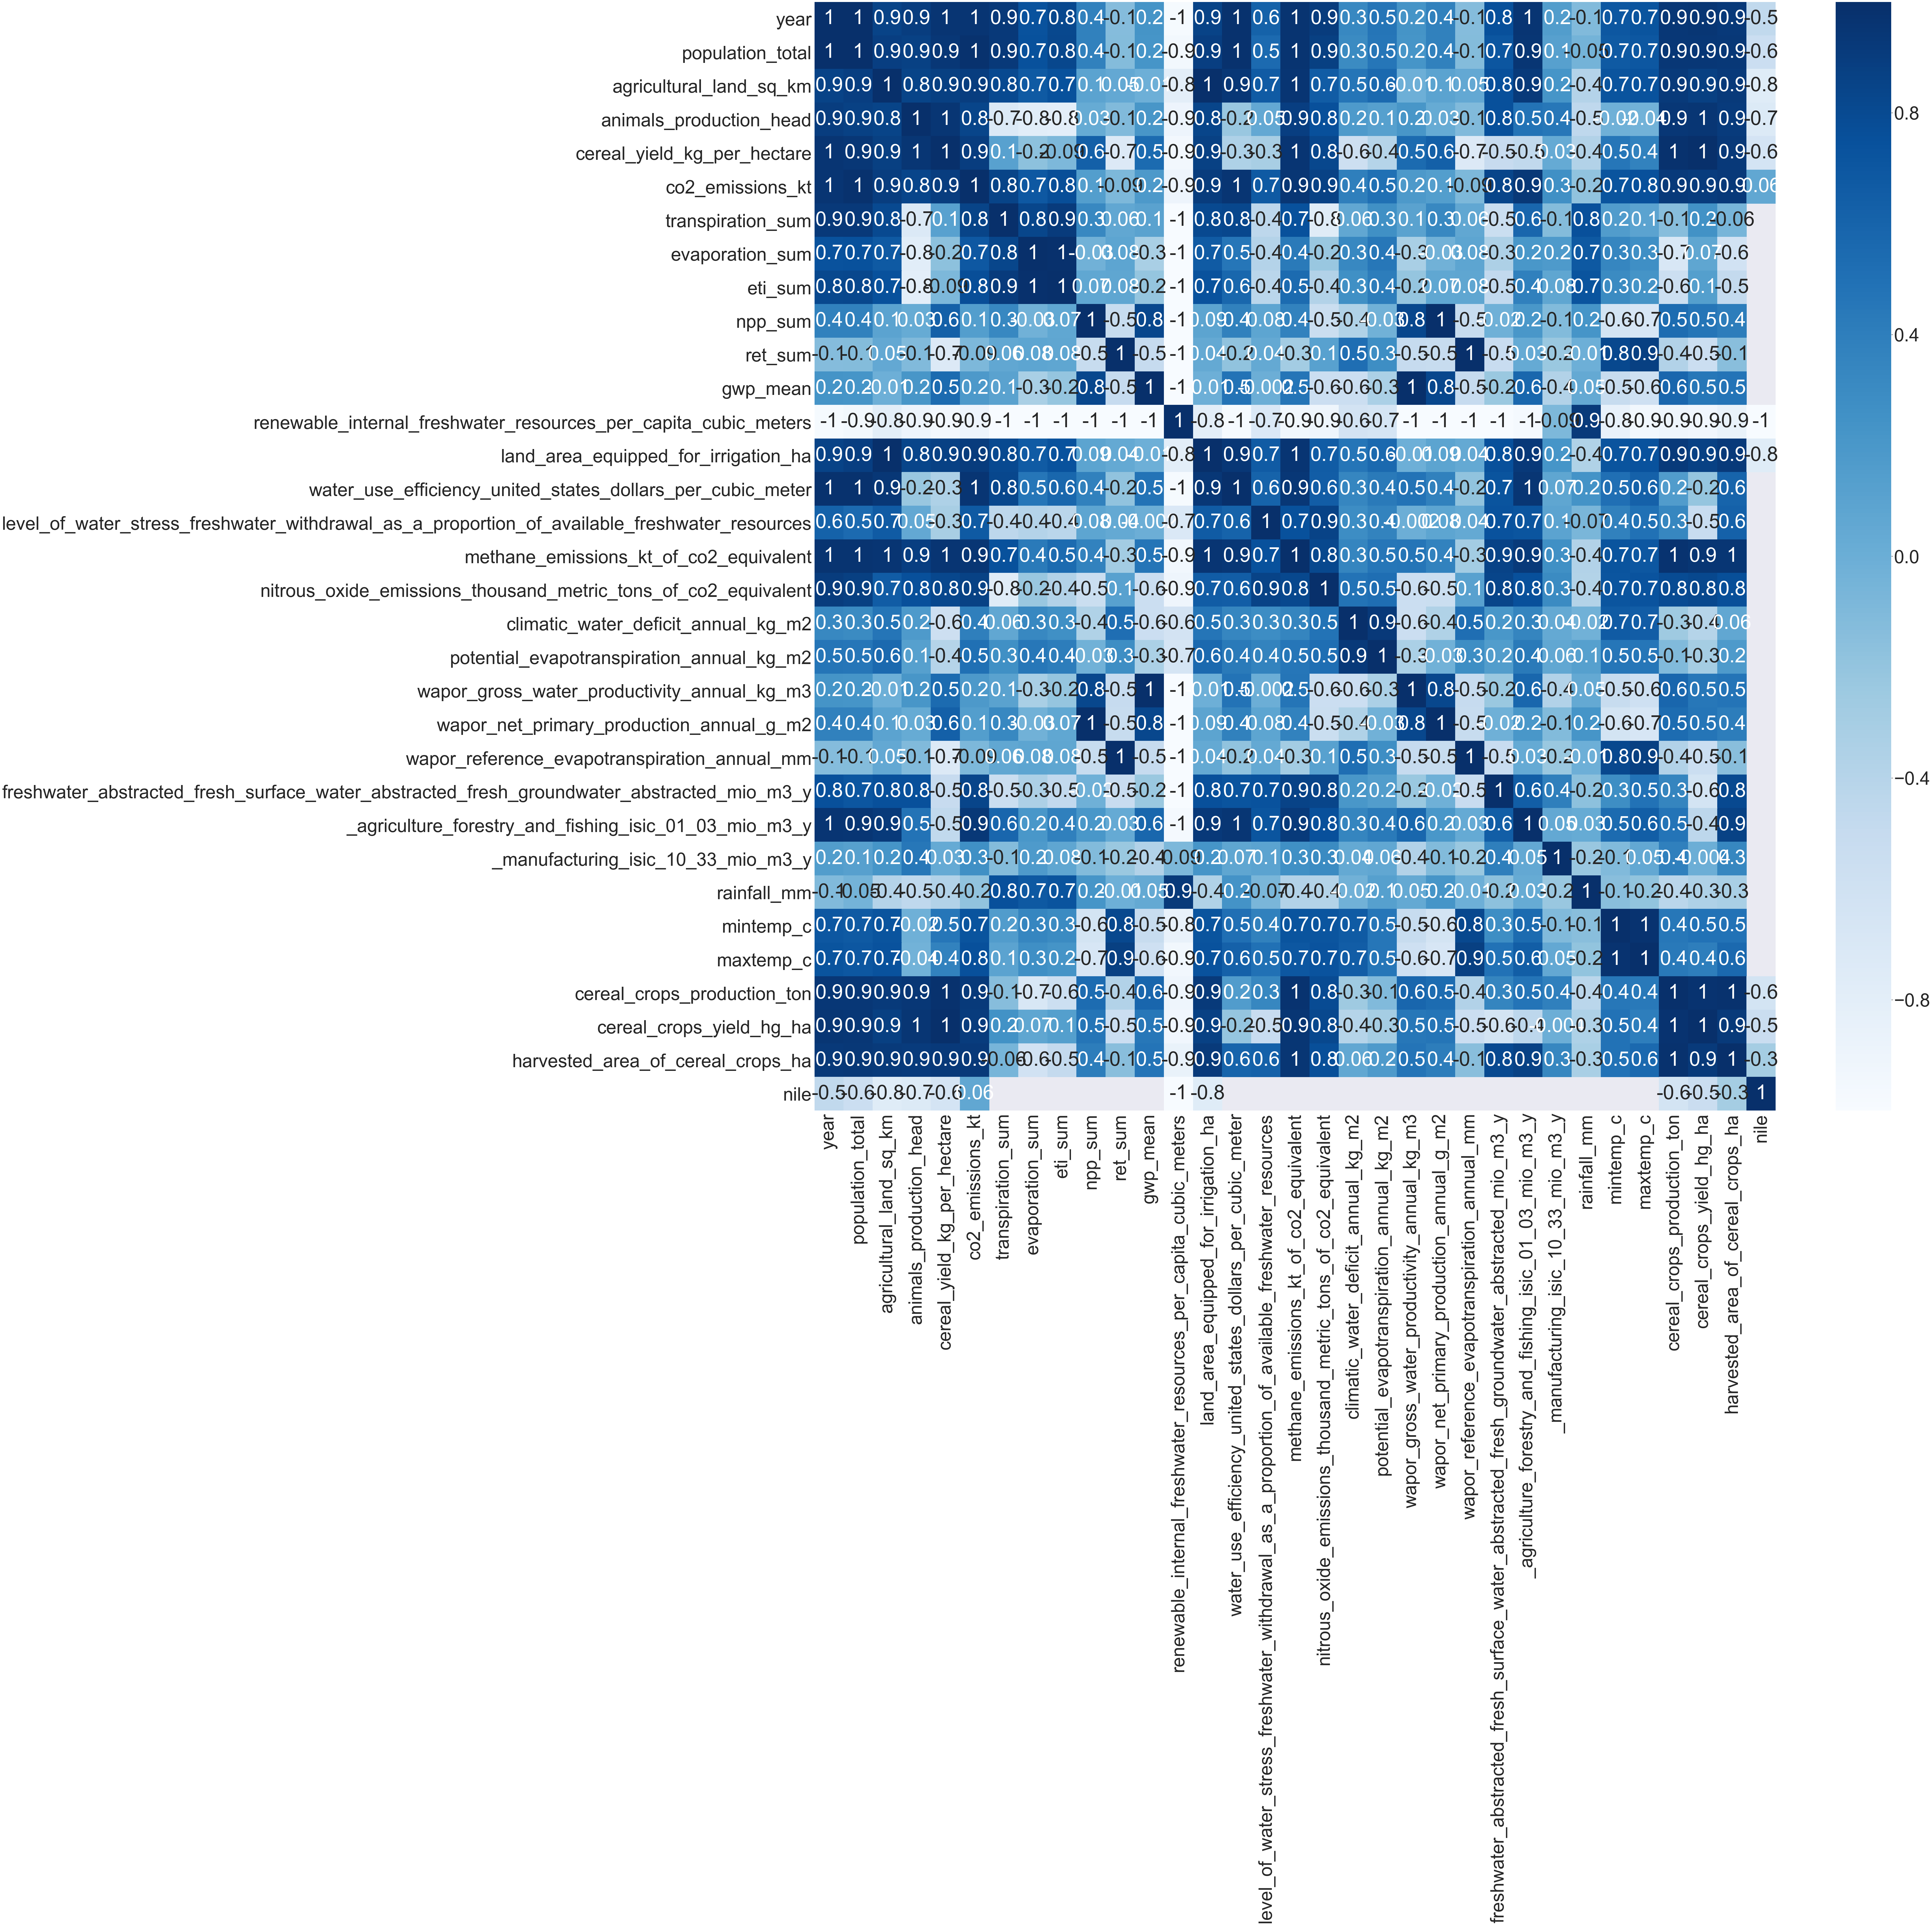

In [292]:
sb.set(font_scale=5.9)
plt.figure(figsize=(76,72))
ax=plt.subplot(111)
sb.heatmap(final_data.corr(), cmap="Blues",ax=ax, annot=True,fmt='.1g');

<a id='Q'></a>
### What is the impect of climate change on water cycle?

In [259]:
final_data.columns

Index(['year', 'population_total', 'agricultural_land_sq_km',
       'animals_production_head', 'cereal_yield_kg_per_hectare',
       'co2_emissions_kt', 'transpiration_sum', 'evaporation_sum', 'eti_sum',
       'npp_sum', 'ret_sum', 'gwp_mean',
       'renewable_internal_freshwater_resources_per_capita_cubic_meters',
       'land_area_equipped_for_irrigation_ha',
       'water_use_efficiency_united_states_dollars_per_cubic_meter',
       'level_of_water_stress_freshwater_withdrawal_as_a_proportion_of_available_freshwater_resources',
       'methane_emissions_kt_of_co2_equivalent',
       'nitrous_oxide_emissions_thousand_metric_tons_of_co2_equivalent',
       'climatic_water_deficit_annual_kg_m2',
       'potential_evapotranspiration_annual_kg_m2',
       'wapor_gross_water_productivity_annual_kg_m3',
       'wapor_net_primary_production_annual_g_m2',
       'wapor_reference_evapotranspiration_annual_mm',
       'freshwater_abstracted_fresh_surface_water_abstracted_fresh_groundwater_a

In [293]:
climat_corr_data=final_data[['year','co2_emissions_kt','transpiration_sum', 'evaporation_sum', 'eti_sum',
                      'npp_sum', 'ret_sum', 'gwp_mean','renewable_internal_freshwater_resources_per_capita_cubic_meters',
                      'methane_emissions_kt_of_co2_equivalent',
                      'nitrous_oxide_emissions_thousand_metric_tons_of_co2_equivalent',
                      'climatic_water_deficit_annual_kg_m2',
                      'potential_evapotranspiration_annual_kg_m2',
                      'wapor_gross_water_productivity_annual_kg_m3',
                      'wapor_net_primary_production_annual_g_m2',
                      'wapor_reference_evapotranspiration_annual_mm',
                      'freshwater_abstracted_fresh_surface_water_abstracted_fresh_groundwater_abstracted_mio_m3_y',
                      '_agriculture_forestry_and_fishing_isic_01_03_mio_m3_y','rainfall_mm','mintemp_c',
                      'maxtemp_c','nile'
                     ]]

In [294]:
climat_corr_data.corr()

year  \
year                                                                                        1.00   
co2_emissions_kt                                                                            0.96   
transpiration_sum                                                                           0.92   
evaporation_sum                                                                             0.74   
eti_sum                                                                                     0.82   
npp_sum                                                                                     0.38   
ret_sum                                                                                    -0.13   
gwp_mean                                                                                    0.23   
renewable_internal_freshwater_resources_per_capita_cubic_meters                            -0.98   
methane_emissions_kt_of_co2_equivalent                                                      0.96   
nitrous_oxide_emissions_thousand_metric_tons_of_co2_equivalent                              0.90   
climatic_water_deficit_annual_kg_m2                                                         0.32   
potential_evapotranspiration_annual_kg_m2                                                   0.47   
wapor_gross_water_productivity_annual_kg_m3                                                 0.23   
wapor_net_primary_production_annual_g_m2                                                    0.38   
wapor_reference_evapotranspiration_annual_mm                                               -0.13   
freshwater_abstracted_fresh_surface_water_abstracted_fresh_groundwater_abstracted_mio_m3_y  0.75   
_agriculture_forestry_and_fishing_isic_01_03_mio_m3_y                                       0.96   
rainfall_mm                                                                                -0.10   
mintemp_c                                                                                   0.70   
maxtemp_c                                                                                   0.72   
nile                                                                                       -0.47   

                                                                                            co2_emissions_kt  \
year                                                                                                    0.96   
co2_emissions_kt                                                                                        1.00   
transpiration_sum                                                                                       0.85   
evaporation_sum                                                                                         0.69   
eti_sum                                                                                                 0.77   
npp_sum                                                                                                 0.15   
ret_sum                                                                                                -0.09   
gwp_mean                                                                                                0.19   
renewable_internal_freshwater_resources_per_capita_cubic_meters                                        -0.89   
methane_emissions_kt_of_co2_equivalent                                                                  0.95   
nitrous_oxide_emissions_thousand_metric_tons_of_co2_equivalent                                          0.86   
climatic_water_deficit_annual_kg_m2                                                                     0.40   
potential_evapotranspiration_annual_kg_m2                                                               0.50   
wapor_gross_water_productivity_annual_kg_m3                                                             0.19   
wapor_net_primary_production_annual_g_m2                                                                0.15   

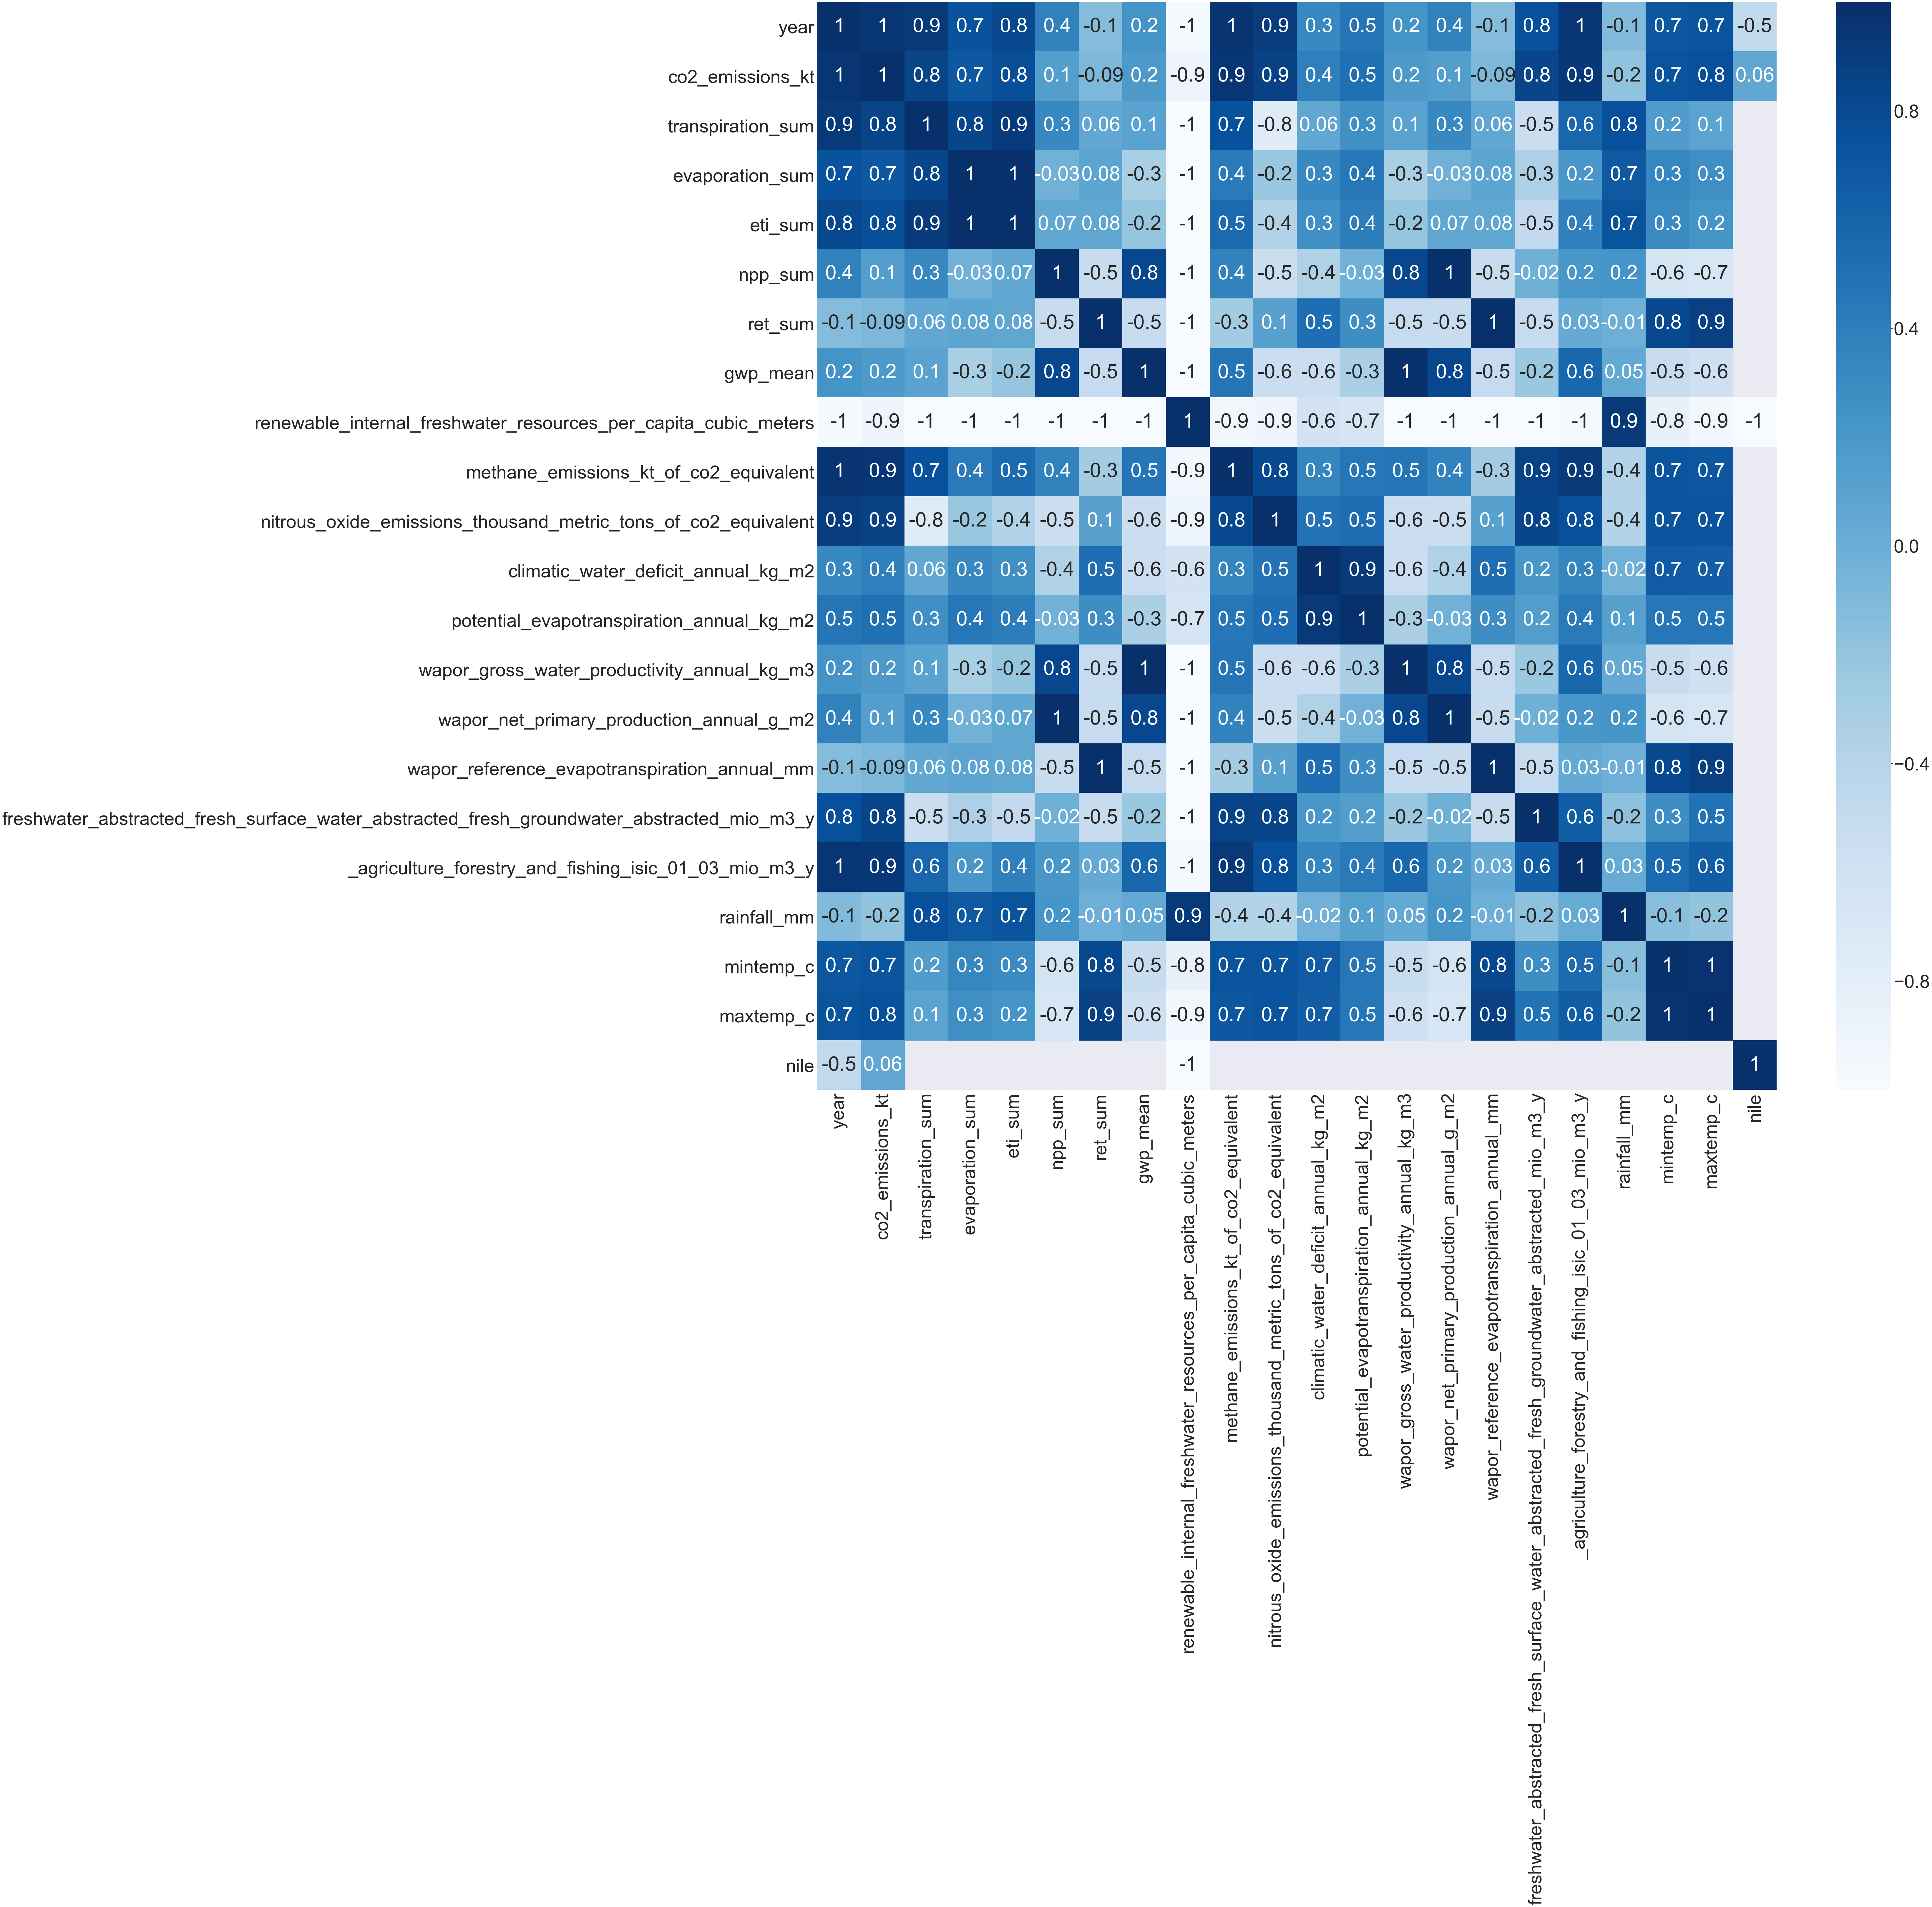

In [295]:
sb.set(font_scale=5.7)
plt.figure(figsize=(73,68))
ax=plt.subplot(111)
sb.heatmap(climat_corr_data.corr(), cmap="Blues",ax=ax, annot=True,fmt='.1g');

<a id='insights'></a>
# Insights

## With raising of emissions over years and increasing of Temperature, we can illustrates the following Insights:
* 1- 'renewable internal freshwater resources per capita cubic meters' is decreasing countinously over yers and has strongly negative correlation with climate change. 

* 2- As Evapotranspiration (ET) is an important part of the water cycle, the figure shows that sum of ET is increasing by effect of emissions, which causes a negative impect on freshwater cycle 'production', also it has a strong positive correlation with average of rain.   

• ETI (Actual EvapoTranspiration and Interception):
o The actual EvapoTranspiration and Interception (ETIa) (dekadal, in mm/day) is the sum of the soil evaporation (E), canopy transpiration (T), and evaporation from rainfall intercepted by leaves (I).

* 3- There is a negative correlation between mean of Nile flow and time, by increasing of time, the flow of the Nile is decreasing.

### percentage of missing value 

In [263]:
final_data.isnull().mean()*100 # water data has the highest missingness...

year                                                                                             0.00
population_total                                                                                 0.00
agricultural_land_sq_km                                                                          4.92
animals_production_head                                                                          3.28
cereal_yield_kg_per_hectare                                                                      4.92
co2_emissions_kt                                                                                 3.28
transpiration_sum                                                                               80.33
evaporation_sum                                                                                 80.33
eti_sum                                                                                         80.33
npp_sum                                                                           

<a id='imputation'></a>

### test imputation 

In [296]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [297]:
copy_data_without_wdf=final_data.copy()

In [298]:
pd.set_option('display.max_rows', copy_data_without_wdf.shape[0]+1)
display(copy_data_without_wdf)

year  population_total  agricultural_land_sq_km  \
0   1,960.00     26,632,891.00                      nan   
1   1,961.00     27,366,239.00                25,680.00   
2   1,962.00     28,112,258.00                25,050.00   
3   1,963.00     28,871,383.00                24,900.00   
4   1,964.00     29,644,875.00                25,060.00   
5   1,965.00     30,433,024.00                26,720.00   
6   1,966.00     31,237,597.00                27,800.00   
7   1,967.00     32,056,506.00                28,010.00   
8   1,968.00     32,881,852.00                28,010.00   
9   1,969.00     33,703,127.00                28,350.00   
10  1,970.00     34,513,851.00                28,430.00   
11  1,971.00     35,311,905.00                28,520.00   
12  1,972.00     36,102,670.00                28,550.00   
13  1,973.00     36,896,551.00                28,550.00   
14  1,974.00     37,708,144.00                28,430.00   
15  1,975.00     38,549,133.00                28,250.00   
16  1,976.00     39,422,731.00                27,300.00   
17  1,977.00     40,329,589.00                26,350.00   
18  1,978.00     41,275,728.00                25,400.00   
19  1,979.00     42,267,429.00                24,470.00   
20  1,980.00     43,309,063.00                24,450.00   
21  1,981.00     44,400,113.00                24,680.00   
22  1,982.00     45,539,295.00                24,452.40   
23  1,983.00     46,728,284.00                24,347.40   
24  1,984.00     47,968,643.00                24,582.60   
25  1,985.00     49,258,726.00                24,970.00   
26  1,986.00     50,602,360.00                25,670.00   
27  1,987.00     51,991,696.00                25,470.00   
28  1,988.00     53,399,243.00                25,810.00   
29  1,989.00     54,788,680.00                25,710.00   
30  1,990.00     56,134,478.00                26,480.00   
31  1,991.00     57,424,552.00                26,430.00   
32  1,992.00     58,666,812.00                29,962.80   
33  1,993.00     59,880,656.00                30,151.80   
34  1,994.00     61,095,804.00                30,126.60   
35  1,995.00     62,334,025.00                32,830.00   
36  1,996.00     63,601,632.00                31,764.60   
37  1,997.00     64,892,269.00                32,449.20   
38  1,998.00     66,200,259.00                32,596.20   
39  1,999.00     67,515,591.00                34,830.00   
40  2,000.00     68,831,561.00                32,910.00   
41  2,001.00     70,152,662.00                33,380.00   
42  2,002.00     71,485,044.00                34,240.00   
43  2,003.00     72,826,102.00                34,090.00   
44  2,004.00     74,172,073.00                34,780.00   
45  2,005.00     75,523,576.00                35,230.00   
46  2,006.00     76,873,670.00                35,330.00   
47  2,007.00     78,232,124.00                35,380.00   
48  2,008.00     79,636,081.00                35,420.00   
49  2,009.00     81,134,789.00                36,890.00   
50  2,010.00     82,761,244.00                36,710.00   
51  2,011.00     84,529,251.00                36,200.00   
52  2,012.00     86,422,240.00                36,960.00   
53  2,013.00     88,404,652.00                37,309.70   
54  2,014.00     90,424,668.00                37,151.90   
55  2,015.00     92,442,549.00                37,898.77   
56  2,016.00     94,447,071.00                37,337.65   
57  2,017.00     96,442,590.00                38,359.69   
58  2,018.00     98,423,602.00                38,359.69   
59  2,019.00    100,388,076.00                      nan   
60  2,020.00    102,334,403.00                      nan   
61  1,871.00               nan                      nan   
62  1,872.00               nan                      nan   
63  1,873.00               nan                      nan   
64  1,874.00               nan                      nan   
65  1,875.00               nan                      nan   
66  1,876.00               nan                      nan

In [299]:
copy_data_without_wdf.columns

Index(['year', 'population_total', 'agricultural_land_sq_km',
       'animals_production_head', 'cereal_yield_kg_per_hectare',
       'co2_emissions_kt', 'transpiration_sum', 'evaporation_sum', 'eti_sum',
       'npp_sum', 'ret_sum', 'gwp_mean',
       'renewable_internal_freshwater_resources_per_capita_cubic_meters',
       'land_area_equipped_for_irrigation_ha',
       'water_use_efficiency_united_states_dollars_per_cubic_meter',
       'level_of_water_stress_freshwater_withdrawal_as_a_proportion_of_available_freshwater_resources',
       'methane_emissions_kt_of_co2_equivalent',
       'nitrous_oxide_emissions_thousand_metric_tons_of_co2_equivalent',
       'climatic_water_deficit_annual_kg_m2',
       'potential_evapotranspiration_annual_kg_m2',
       'wapor_gross_water_productivity_annual_kg_m3',
       'wapor_net_primary_production_annual_g_m2',
       'wapor_reference_evapotranspiration_annual_mm',
       'freshwater_abstracted_fresh_surface_water_abstracted_fresh_groundwater_a

In [300]:
copy_data_without_wdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 33 columns):
year                                                                                             150 non-null float64
population_total                                                                                 61 non-null float64
agricultural_land_sq_km                                                                          58 non-null float64
animals_production_head                                                                          59 non-null float64
cereal_yield_kg_per_hectare                                                                      58 non-null float64
co2_emissions_kt                                                                                 59 non-null float64
transpiration_sum                                                                                12 non-null float64
evaporation_sum                                                            

In [301]:
copy_data_without_wdf[['cereal_yield_kg_per_hectare',
       'co2_emissions_kt', 'land_area_equipped_for_irrigation_ha',
       'methane_emissions_kt_of_co2_equivalent',
       'nitrous_oxide_emissions_thousand_metric_tons_of_co2_equivalent',
       'rainfall_mm', 'mintemp_c', 'maxtemp_c']].describe()

cereal_yield_kg_per_hectare  co2_emissions_kt  \
count                        58.00             59.00   
mean                      5,455.93         95,538.16   
std                       1,574.71         71,175.90   
min                       2,905.70         16,054.13   
25%                       3,954.53         29,370.84   
50%                       5,475.35         74,810.47   
75%                       7,155.85        136,965.00   
max                       7,556.20        246,260.00   

       land_area_equipped_for_irrigation_ha  \
count                                 58.00   
mean                               3,019.93   
std                                  464.40   
min                                2,434.00   
25%                                2,573.50   
50%                                2,853.50   
75%                                3,458.75   
max                                3,823.00   

       methane_emissions_kt_of_co2_equivalent  \
count                                   49.00   
mean                                36,890.91   
std                                 14,575.74   
min                                 19,836.80   
25%                                 21,802.00   
50%                                 34,550.00   
75%                                 52,150.00   
max                                 56,870.00   

       nitrous_oxide_emissions_thousand_metric_tons_of_co2_equivalent  \
count                                                           49.00   
mean                                                        17,140.40   
std                                                          4,832.38   
min                                                          7,888.60   
25%                                                         15,590.00   
50%                                                         17,876.65   
75%                                                         21,270.00   
max                                                         23,650.00   

       rainfall_mm  mintemp_c  maxtemp_c  
count        30.00      30.00      30.00  
mean          2.75      15.73      30.33  
std           0.61       0.52       0.54  
min           1.88      14.54      29.08  
25%           2.29      15.45      30.04  
50%           2.75      15.77      30.31  
75%           3.11      15.94      30.66  
max           4.26      17.12      31.79

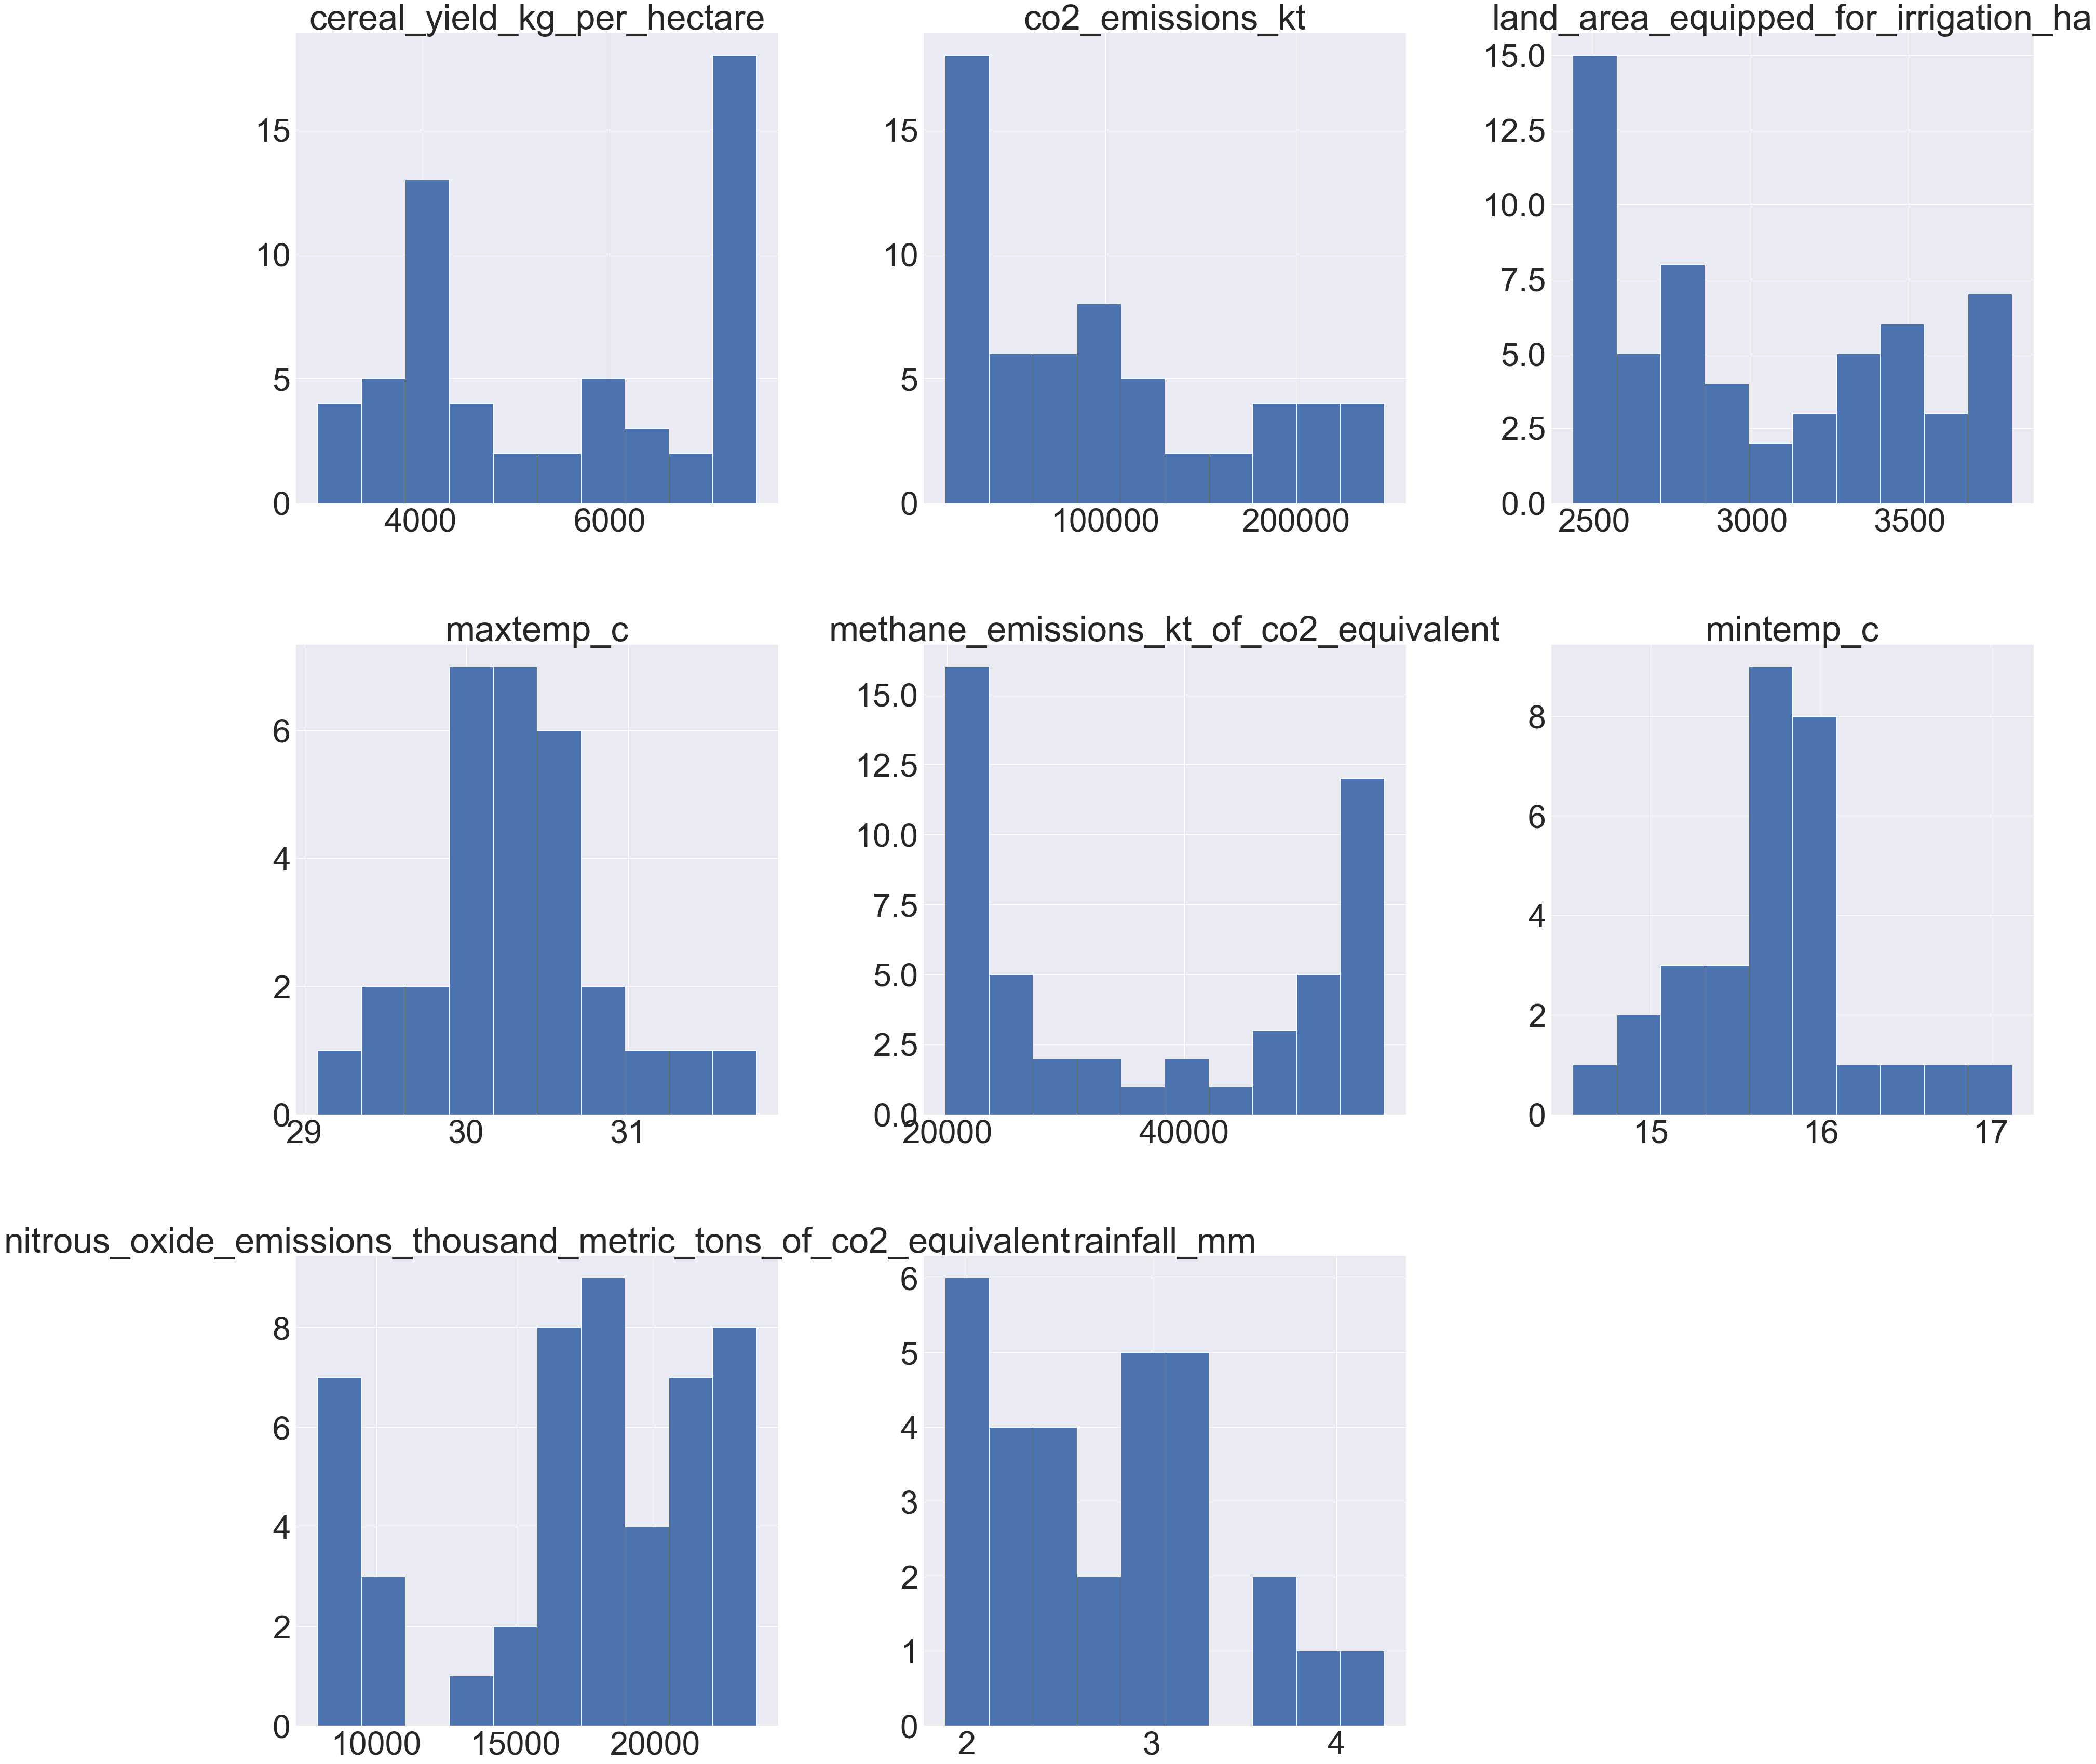

In [302]:
pd.plotting.hist_frame(copy_data_without_wdf[['cereal_yield_kg_per_hectare',
       'co2_emissions_kt', 'land_area_equipped_for_irrigation_ha',
       'methane_emissions_kt_of_co2_equivalent',
       'nitrous_oxide_emissions_thousand_metric_tons_of_co2_equivalent',
       'rainfall_mm', 'mintemp_c', 'maxtemp_c']]);

In [303]:
copy_data_without_wdf.columns

Index(['year', 'population_total', 'agricultural_land_sq_km',
       'animals_production_head', 'cereal_yield_kg_per_hectare',
       'co2_emissions_kt', 'transpiration_sum', 'evaporation_sum', 'eti_sum',
       'npp_sum', 'ret_sum', 'gwp_mean',
       'renewable_internal_freshwater_resources_per_capita_cubic_meters',
       'land_area_equipped_for_irrigation_ha',
       'water_use_efficiency_united_states_dollars_per_cubic_meter',
       'level_of_water_stress_freshwater_withdrawal_as_a_proportion_of_available_freshwater_resources',
       'methane_emissions_kt_of_co2_equivalent',
       'nitrous_oxide_emissions_thousand_metric_tons_of_co2_equivalent',
       'climatic_water_deficit_annual_kg_m2',
       'potential_evapotranspiration_annual_kg_m2',
       'wapor_gross_water_productivity_annual_kg_m3',
       'wapor_net_primary_production_annual_g_m2',
       'wapor_reference_evapotranspiration_annual_mm',
       'freshwater_abstracted_fresh_surface_water_abstracted_fresh_groundwater_a

In [304]:
import time
t1=time.time()

imp_mean = IterativeImputer(estimator=RandomForestRegressor(), random_state=0)
imp_mean.fit(copy_data_without_wdf[['cereal_yield_kg_per_hectare',
       'co2_emissions_kt', 'land_area_equipped_for_irrigation_ha',
       'methane_emissions_kt_of_co2_equivalent',
       'nitrous_oxide_emissions_thousand_metric_tons_of_co2_equivalent',
       'rainfall_mm', 'mintemp_c', 'maxtemp_c']])
copy_data_without_wdf[['cereal_yield_kg_per_hectare',
       'co2_emissions_kt', 'land_area_equipped_for_irrigation_ha',
       'methane_emissions_kt_of_co2_equivalent',
       'nitrous_oxide_emissions_thousand_metric_tons_of_co2_equivalent',
       'rainfall_mm', 'mintemp_c', 'maxtemp_c']]=imp_mean.transform(copy_data_without_wdf[['cereal_yield_kg_per_hectare',
       'co2_emissions_kt', 'land_area_equipped_for_irrigation_ha',
       'methane_emissions_kt_of_co2_equivalent',
       'nitrous_oxide_emissions_thousand_metric_tons_of_co2_equivalent',
       'rainfall_mm', 'mintemp_c', 'maxtemp_c']])
time.time() - t1

1.346426248550415

In [305]:
type(copy_data_without_wdf)

pandas.core.frame.DataFrame

In [306]:
copy_data_without_wdf.describe()

year  population_total  agricultural_land_sq_km  \
count   150.00             61.00                    58.00   
mean  1,945.50     58,277,667.08                30,267.78   
std      43.45     22,191,817.18                 4,697.83   
min   1,871.00     26,632,891.00                24,347.40   
25%   1,908.25     38,549,133.00                25,735.00   
50%   1,945.50     56,134,478.00                28,535.00   
75%   1,982.75     75,523,576.00                34,817.50   
max   2,020.00    102,334,403.00                38,359.69   

       animals_production_head  cereal_yield_kg_per_hectare  co2_emissions_kt  \
count                    59.00                       150.00            150.00   
mean             17,933,812.75                     5,103.05         82,961.21   
std              10,320,162.73                     1,028.55         45,564.44   
min               4,868,000.00                     2,905.70         16,054.13   
25%               7,717,912.00                     4,886.96         74,681.02   
50%              12,607,000.00                     4,886.96         74,681.02   
75%              28,345,438.50                     4,886.96         74,681.02   
max              30,508,486.00                     7,556.20        246,260.00   

       transpiration_sum  evaporation_sum  eti_sum  npp_sum  ret_sum  \
count              12.00            12.00    12.00    12.00    12.00   
mean               50.41            40.94    79.79     2.00 2,494.21   
std                 1.94             5.55     7.34     0.48    44.50   
min                47.33            34.52    70.18     1.01 2,426.22   
25%                49.12            37.94    75.20     1.80 2,461.90   
50%                50.39            40.18    78.31     1.94 2,493.27   
75%                51.52            41.31    80.83     2.26 2,516.87   
max                53.76            51.97    93.63     2.69 2,596.80   

       gwp_mean  \
count     12.00   
mean       0.05   
std        0.01   
min        0.04   
25%        0.05   
50%        0.06   
75%        0.06   
max        0.07   

       renewable_internal_freshwater_resources_per_capita_cubic_meters  \
count                                                            12.00   
mean                                                             20.14   
std                                                               8.18   
min                                                              10.37   
25%                                                              13.69   
50%                                                              18.14   
75%                                                              25.52   
max                                                              35.57   

       land_area_equipped_for_irrigation_ha  \
count                                150.00   
mean                               2,732.88   
std                                  368.13   
min                                2,434.00   
25%                                2,549.00   
50%                                2,549.00   
75%                                2,767.50   
max                                3,823.00   

       water_use_efficiency_united_states_dollars_per_cubic_meter  \
count                                                       19.00   
mean                                                         3.41   
std                                                          0.81   
min                                                          2.37   
25%                                                          2.62   
50%                                                          3.28   
75%                                                          4.24   
max                                                          4.58   

       level_of_water_stress_freshwater_withdrawal_as_a_proportion_of_available_freshwater_resources  \
count                                                                                       

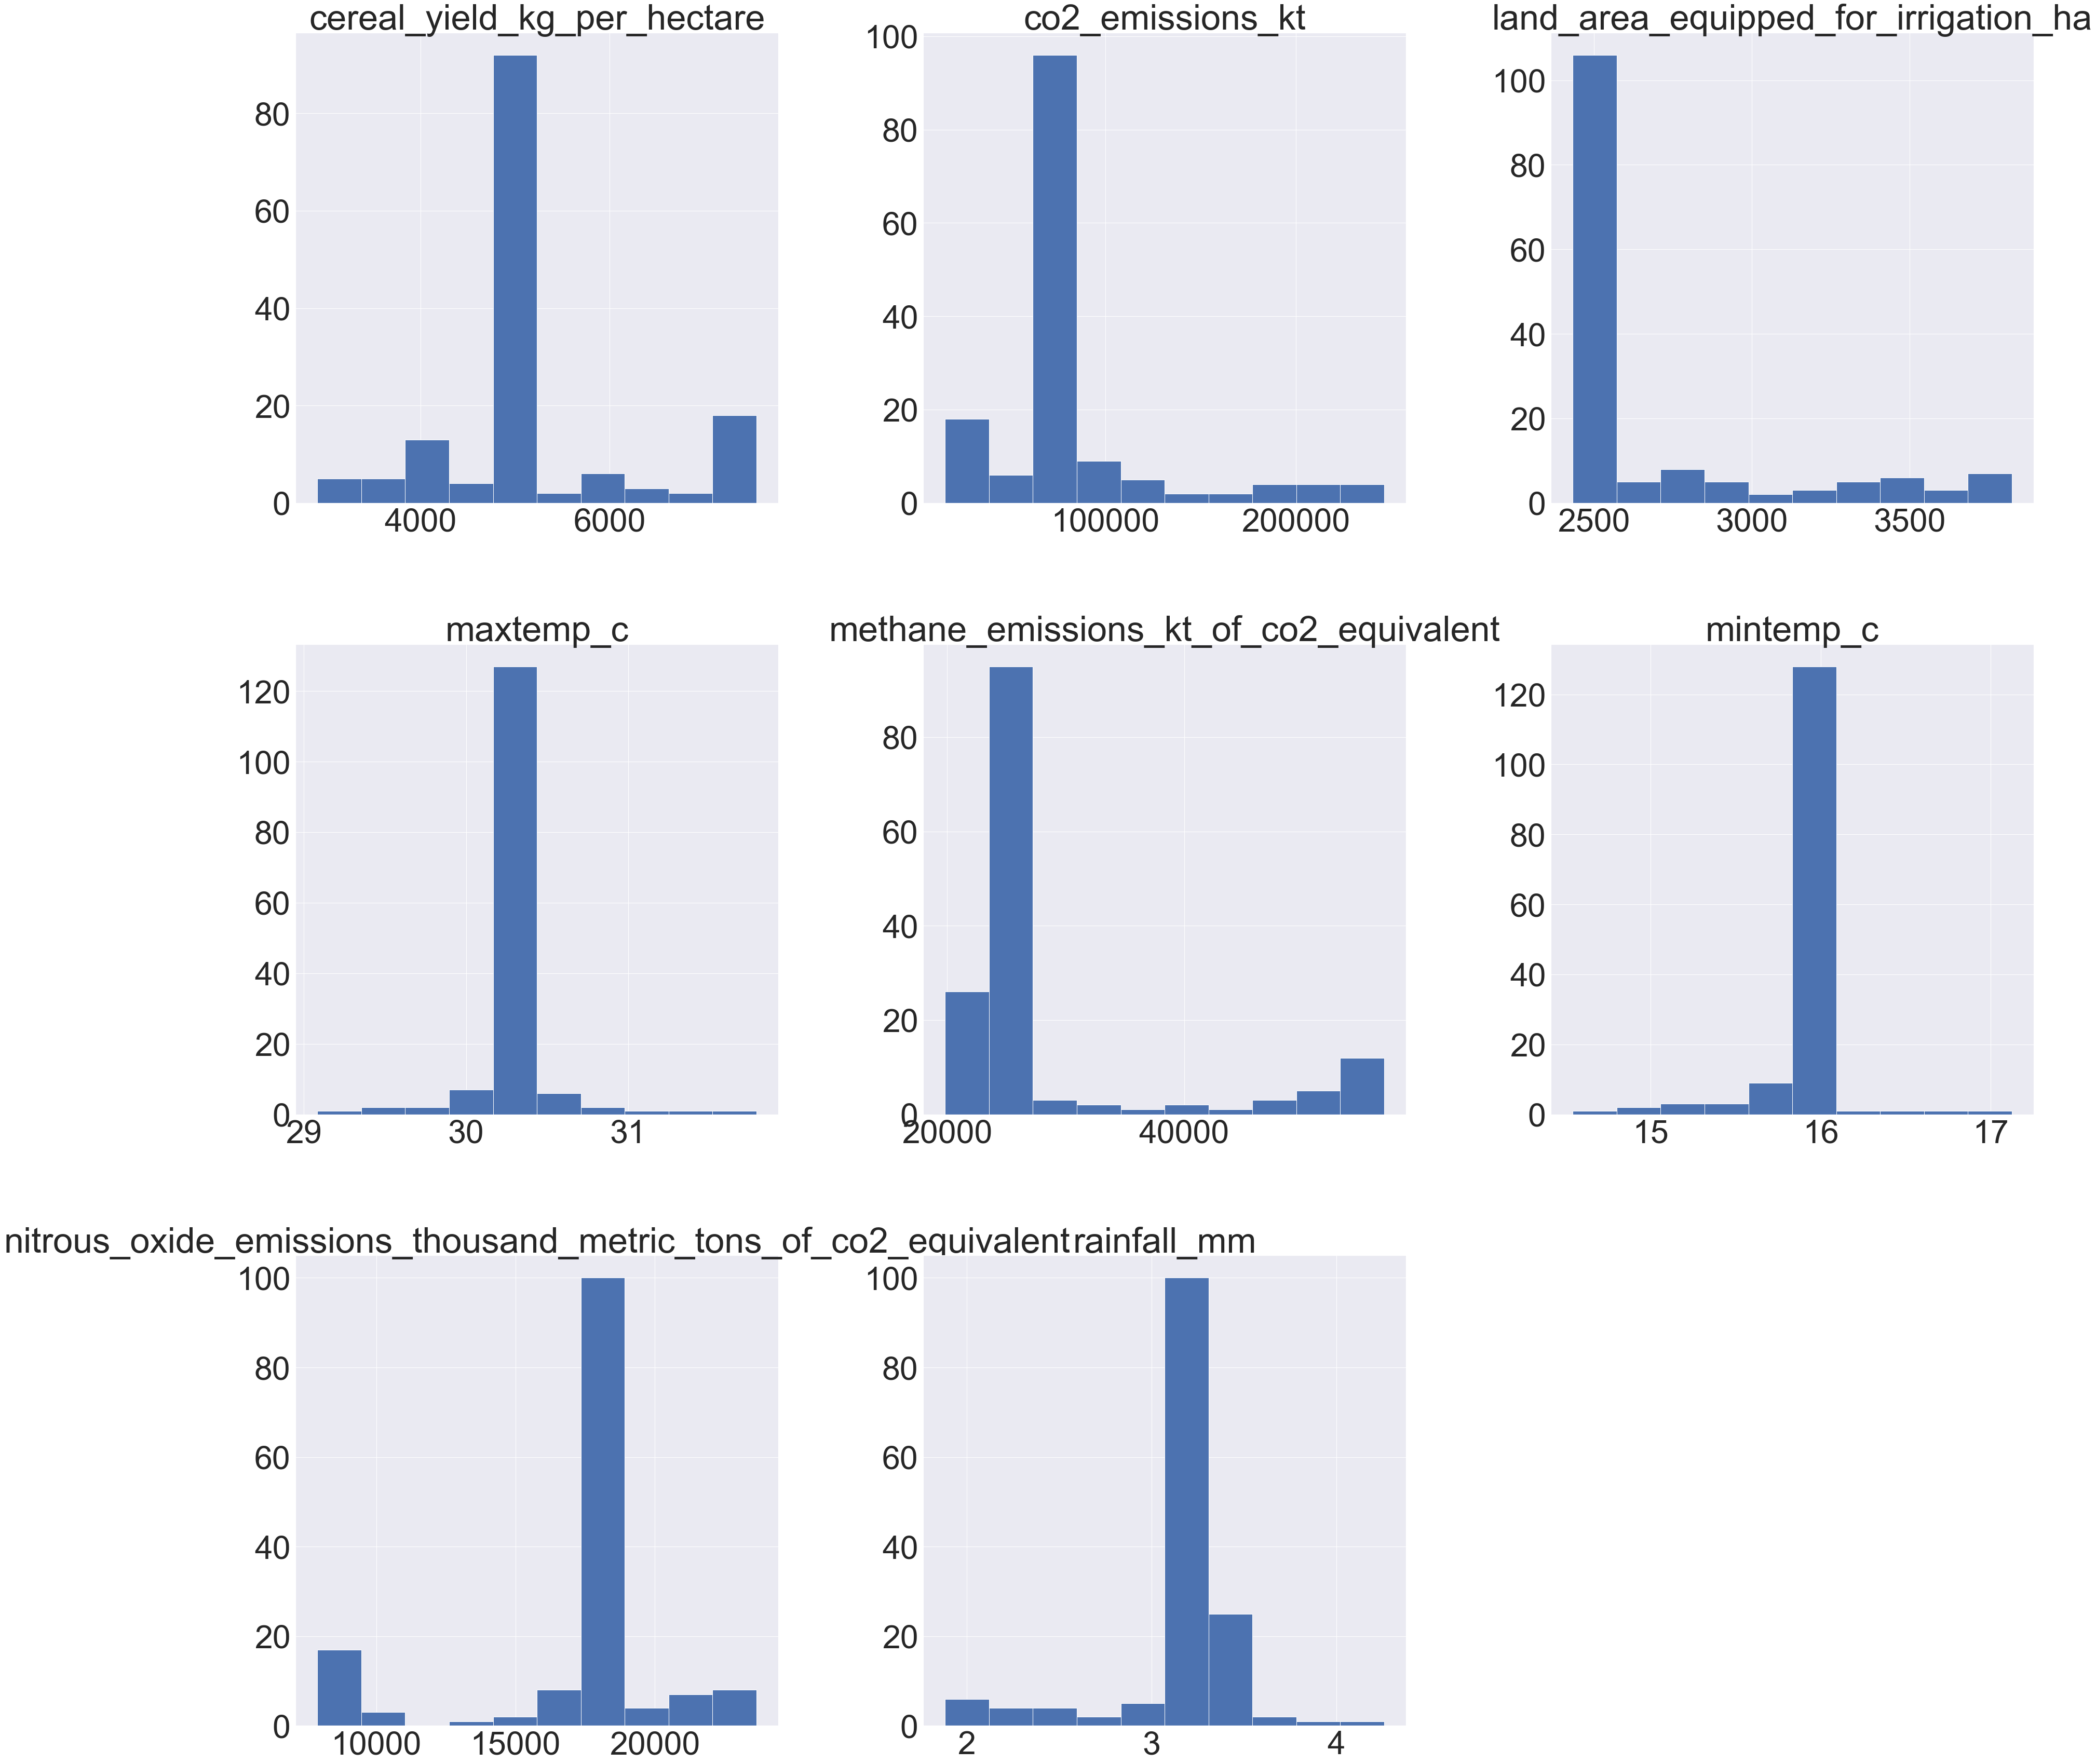

In [307]:
pd.plotting.hist_frame(copy_data_without_wdf[['cereal_yield_kg_per_hectare',
       'co2_emissions_kt', 'land_area_equipped_for_irrigation_ha',
       'methane_emissions_kt_of_co2_equivalent',
       'nitrous_oxide_emissions_thousand_metric_tons_of_co2_equivalent',
       'rainfall_mm', 'mintemp_c', 'maxtemp_c']]);

### We must try another imputation with different parameters, cause the shape of data doesn't look good 'clumped up around mean'.

In [308]:
pd.set_option('display.max_rows', copy_data_without_wdf[['cereal_yield_kg_per_hectare',
       'co2_emissions_kt', 'land_area_equipped_for_irrigation_ha',
       'methane_emissions_kt_of_co2_equivalent',
       'nitrous_oxide_emissions_thousand_metric_tons_of_co2_equivalent',
       'rainfall_mm', 'mintemp_c', 'maxtemp_c']].shape[0]+1)
display(copy_data_without_wdf[['cereal_yield_kg_per_hectare',
       'co2_emissions_kt', 'land_area_equipped_for_irrigation_ha',
       'methane_emissions_kt_of_co2_equivalent',
       'nitrous_oxide_emissions_thousand_metric_tons_of_co2_equivalent',
       'rainfall_mm', 'mintemp_c', 'maxtemp_c']])

cereal_yield_kg_per_hectare  co2_emissions_kt  \
0                       3,164.07         16,054.13   
1                       2,905.70         17,088.22   
2                       3,259.60         18,595.36   
3                       3,312.80         21,554.63   
4                       3,330.10         25,522.32   
5                       3,775.60         27,641.85   
6                       3,565.50         26,563.75   
7                       3,557.30         19,677.12   
8                       3,627.10         22,904.08   
9                       3,716.60         19,695.46   
10                      3,911.80         21,686.64   
11                      3,911.50         23,047.10   
12                      3,951.30         25,511.32   
13                      4,080.00         23,795.16   
14                      3,840.40         26,123.71   
15                      3,978.10         31,099.83   
16                      3,941.10         34,495.47   
17                      3,923.80         37,865.44   
18                      4,019.30         39,313.91   
19                      3,964.20         42,947.90   
20                      4,094.50         45,239.78   
21                      4,100.50         50,978.63   
22                      4,203.70         56,523.14   
23                      4,321.10         57,091.52   
24                      4,347.50         63,838.80   
25                      4,539.20         63,937.81   
26                      4,696.20         74,564.78   
27                      4,891.60         74,810.47   
28                      5,028.80         74,531.77   
29                      5,337.70         72,181.23   
30                      5,702.90         86,820.00   
31                      5,613.00         89,390.00   
32                      5,898.50         92,300.00   
33                      5,995.10         91,830.00   
34                      5,861.10         86,430.00   
35                      5,903.70         91,870.00   
36                      6,499.10         96,770.00   
37                      6,605.50        103,960.00   
38                      6,797.40        109,270.00   
39                      7,166.60        114,670.00   
40                      7,280.10        112,860.00   
41                      7,099.40        125,010.00   
42                      7,445.60        127,740.00   
43                      7,515.40        131,240.00   
44                      7,556.20        142,690.00   
45                      7,536.90        160,590.00   
46                      7,500.20        169,130.00   
47                      7,418.50        182,230.00   
48                      7,452.20        189,120.00   
49                      7,158.30        195,490.00   
50                      6,504.30        196,500.00   
51                      7,246.30        201,610.00   
52                      7,269.00        212,410.00   
53                      7,285.30        210,430.00   
54                      7,085.10        216,650.00   
55                      7,117.20        225,950.00   
56                      7,248.90        233,960.00   
57                      7,401.10        238,690.00   
58                      7,148.50        246,260.00   
59                      6,126.04         86,132.19   
60                      4,783.73         74,687.62   
61                      4,886.96         74,681.02   
62                      4,886.96         74,681.02   
63                      4,886.96         74,681.02   
64                      4,886.96         74,681.02   
65                      4,886.96         74,681.02   
66                      4,886.96         74,681.02   
67                      4,886.96         74,681.02   
68                      4,886.96         74,681.02   
69                      4,886.96         74,681.02   
70                      4,886.96         74,681.02   
71                      4,886.96         74,681.02   
72                      4,886.96         74,681.02   
73       